In [1837]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3358]:
df = pd.read_csv("credit_data.csv",delimiter = '|' )

In [3360]:
df.shape

(648985, 15)

In [3362]:
df["ID"].nunique()

46072

In [1839]:
df.head(5)

,ID,Loan_Type,Balance,Sanction_Amount,Credit_Limit,Date_Opened,Date_Closed,Installment_Amount,Past_Due_Amount,Repayment_Tenure,Terms_Frequency,Ownership_Type,Last_Payment_Amount,Last_Payment_Date,Credit_Score
0,100002,Personal Loan,0,200000,0,22/12/2017,30/12/2019,0,0,NaN,M,Individual,149946,30/12/2019,844
1,100002,Home Loan,0,900000,0,30/05/2018,11/05/2020,0,NaN,NaN,NaN,Joint,NaN,05/05/2020,844
2,100002,Home Loan,0,900000,0,30/05/2018,12/10/2020,0,NaN,NaN,NaN,Joint,NaN,05/10/2020,844
3,100002,Personal Loan,0,700000,0,06/02/2019,06/07/2021,0,0,63,M,Individual,15483,05/07/2021,844
4,100002,Credit Card,0,185123,0,28/11/2018,12/05/2021,0,0,NaN,M,Individual,NaN,30/04/2021,844


In [1840]:
pd.set_option('display.float_format', '{:.0f}'.format)
df.describe()

,ID,Balance,Sanction_Amount,Credit_Limit,Installment_Amount,Past_Due_Amount,Repayment_Tenure,Last_Payment_Amount,Credit_Score
count,648985,648269,648985,631465,648985,526742,205469,156539,648602
mean,84822,201656,1118083,30721,4130,3349,63,157773,742
std,14579,1839294,235032815,102416,53213,151800,900,3733839,116
min,60001,-40407092,0,0,-4114662,0,1,0,300
25%,72347,0,13999,0,0,0,10,3675,722
50%,84411,0,50957,0,0,0,18,14000,780
75%,97717,8889,200000,0,0,0,60,55282,816
max,110497,415899172,100000000000,3000000,16055737,71178503,200000,999999999,900


*It seems that there are multiple loans per id. What is the average count of loans per id ?*

In [1842]:
# Step 1: Group by ID and count the number of loans for each ID
loan_count_per_id = df_copy.groupby('ID').size()

# Step 2: Calculate the average count of loans per ID
average_count_loans_per_id = loan_count_per_id.mean()

# Print the result
print(f"Average count of loans per ID: {average_count_loans_per_id}")


Average count of loans per ID: 14.150926492439472


In [1843]:
# Create a dictionary to store column names and their corresponding missing value percentages
missing_values = {}

# Loop through the columns to calculate the missing values percentage
for col in df.columns:
    missing_percentage = (df[col].isnull().sum() / df.shape[0]) * 100
    missing_values[col] = missing_percentage

# Sort the dictionary by the missing value percentages
sorted_missing_values = dict(sorted(missing_values.items(), key=lambda item: item[1], reverse=True))

# Print the sorted missing values
for col, missing_percentage in sorted_missing_values.items():
    print(f"Missing Values in {col} is {missing_percentage:.2f}%")


Missing Values in Last_Payment_Amount is 75.88%
Missing Values in Repayment_Tenure is 68.34%
Missing Values in Terms_Frequency is 50.57%
Missing Values in Date_Closed is 39.72%
Missing Values in Past_Due_Amount is 18.84%
Missing Values in Last_Payment_Date is 18.62%
Missing Values in Credit_Limit is 2.70%
Missing Values in Balance is 0.11%
Missing Values in Date_Opened is 0.09%
Missing Values in Credit_Score is 0.06%
Missing Values in ID is 0.00%
Missing Values in Loan_Type is 0.00%
Missing Values in Sanction_Amount is 0.00%
Missing Values in Installment_Amount is 0.00%
Missing Values in Ownership_Type is 0.00%


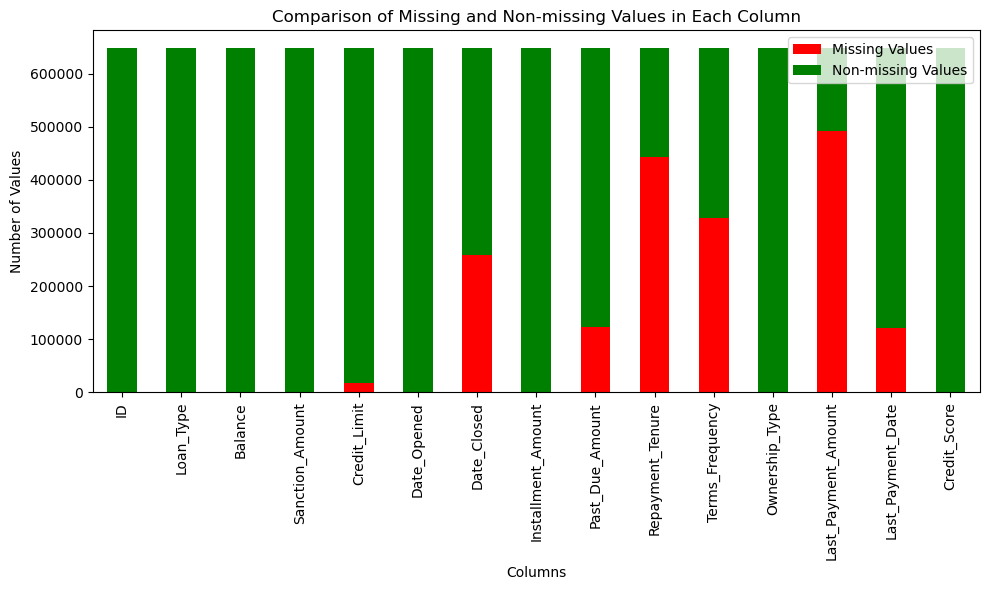

In [3372]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
total_values = len(df)  # Total number of rows in the DataFrame
missing_values = df.isnull().sum()  # Count of missing values in each column
non_missing_values = total_values - missing_values  # Non-missing values

# Create a DataFrame to store the counts
values_df = pd.DataFrame({'Missing Values': missing_values, 'Non-missing Values': non_missing_values})

# Plot the data
values_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Comparison of Missing and Non-missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


# Missing Values Treament

*Majority of Unique ID does not have last_payement_amount so we decide not to consider this column in our exercise*

In [1846]:
#How many ids are affeacted in last payement amount missing values
print(f"Percent of Unique ID affected by Missing values :",(df[df["Last_Payment_Amount"].isnull()]["ID"].nunique()/df["ID"].nunique()*100))

Percent of Unique ID affected by Missing values : 97.13926028824449


## Repayement Tenure Missing

## Term Freqeuncy missing values operation

We can assume that term frequency is dependent upon the type of loan. And we see fill the missing values of the term frequency based on the mode of the Loan_Type

This is because, we see that most of the loan type has one Term frequency which is dominantly high over others

In [1851]:
df_copy = df.copy()

In [1852]:
pd.crosstab(df["Terms_Frequency"],df["Loan_Type"]).transpose()

Terms_Frequency,B,D,M,N,O,Q,S,W,Y
Loan_Type,,,,,,,,,
Business Loan,13,28,14097,88,66,154,93,337,41
Credit Card,0,0,56781,0,160,7,9,0,359
Education Loan,0,0,2321,0,6,2,0,0,22
Gold Loan,60,3,10914,6448,203,255,2,14,930
Home Loan,3,0,24010,11,3,4,5,4,64
LAP,0,0,10685,7,3,5,5,0,35
Micro Finance Loan,0,0,272,0,7,0,0,1,17
Other Loan,8,0,7214,60,405,42,5,18,348
Personal Loan,54,25,153431,4508,18,2,1,224,206


In [1853]:
results = []

# Iterate through each unique loan type
for loan_type in df['Loan_Type'].unique():
    # Filter the DataFrame by loan type
    df_filtered = df[df['Loan_Type'] == loan_type]
    
    # Calculate the percentage of missing values in Terms_Frequency for this loan type
    missing_percent = (df_filtered['Terms_Frequency'].isnull().sum() / df["Terms_Frequency"].isnull().sum()) * 100
    
    # Append the loan type and missing percentage to the results list
    results.append({
        'Loan_Type': loan_type,
        'Missing_Percent of Term Frequency': missing_percent
    })

# Convert the results list to a DataFrame
missing_percent_df = pd.DataFrame(results)

# Print the DataFrame with missing percentages
missing_percent_df.sort_values(by = "Missing_Percent of Term Frequency",ascending = False)


,Loan_Type,Missing_Percent of Term Frequency
0,Personal Loan,30
2,Credit Card,30
6,Gold Loan,20
4,Other Loan,9
8,Business Loan,5
3,Vehicle Loan,3
1,Home Loan,2
7,LAP,1
5,Education Loan,0
9,Micro Finance Loan,0


In [1854]:
import pandas as pd

# Assuming df is your original DataFrame with 'Loan_Type' and 'Terms_Frequency' columns

# Step 1: Fill missing values in Terms_Frequency with the most frequent value (mode) for each Loan_Type
df_copy['Terms_Frequency'] = df_copy.groupby('Loan_Type')['Terms_Frequency'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

# Step 2: Print the DataFrame to check if missing values are filled

**If the loan is not closed then date closed would be empty, we keep it as it is**

## Past due amount refers to payments that have not been made by the cutoff time on the due date for any financial obligation

In [1857]:
df_copy["Past_Due_Amount"].value_counts()

Past_Due_Amount
0         510572
1             94
200           56
100           53
590           46
           ...  
118411         1
5993           1
85377          1
33095          1
344990         1
Name: count, Length: 11843, dtype: int64

In [1858]:
df_copy["Past_Due_Amount"] = df_copy["Past_Due_Amount"].fillna(0)

we can assume that all the past due amount is 0 if it is Nan but lets see

## Last Payement Date

In [1861]:
#Missing Values in Last_Payment_Date is 18.62%
missing_values_count = df[df['Last_Payment_Date'].isnull() & df['Date_Closed'].notnull()]

# Get the count
missing_values_count = missing_values_count.shape[0]

print(f"Number of missing values in Last_Payment_Date where Date_Closed is not null: {missing_values_count}")


Number of missing values in Last_Payment_Date where Date_Closed is not null: 60238


In [1862]:
missing_values_count/df["Last_Payment_Date"].isnull().sum()

0.4985887747585191

In [1863]:
#impute the missing values of Last_Payment_Date only where Date_Closed is available
df_copy.loc[df_copy['Last_Payment_Date'].isnull() & df_copy['Date_Closed'].notnull(), 'Last_Payment_Date'] = df_copy['Date_Closed']


In [1864]:
print(df["Last_Payment_Date"].isnull().sum())
print(df_copy["Last_Payment_Date"].isnull().sum())

120817
60579


What to do with rest of values???

## Credit Limit Missing Values Treatment

In [1867]:
df_copy["Credit_Limit"].isnull().sum()

17520

In [1868]:
# Step 1: Filter the DataFrame for rows where Credit_Limit is null
df_null_credit_limit = df_copy[df_copy["Credit_Limit"].isnull()]

# Step 2: Get the unique IDs affected by null Credit_Limit
unique_ids_affected = df_null_credit_limit["ID"].nunique()

# Step 3: Print the number of unique IDs
print(f"Number of unique IDs affected by null Credit_Limit: {unique_ids_affected}")


Number of unique IDs affected by null Credit_Limit: 11427


In [1869]:
# Step 1: Filter for rows where Credit_Limit is null
df_null_credit_limit = df_copy[df_copy["Credit_Limit"].isnull()]

# Step 2: Get the list of unique IDs where Credit_Limit is null
ids_with_null_credit_limit = df_null_credit_limit["ID"].unique()

# Step 3: Filter the original DataFrame for rows where ID is in the list and Credit_Limit is not null
df_not_null_credit_limit = df_copy[df_copy['ID'].isin(ids_with_null_credit_limit) & df_copy['Credit_Limit'].notnull()]

# Step 4: Get the count of unique IDs that have a non-null Credit_Limit in any other row
unique_ids_with_non_null_credit_limit = df_not_null_credit_limit["ID"].nunique()

# Step 5: Print the result
print(f"Number of unique IDs with non-null Credit_Limit in any other loan: {unique_ids_with_non_null_credit_limit}")


Number of unique IDs with non-null Credit_Limit in any other loan: 11218


deal witt it in aggregation (mean)

In [1873]:
# Step 1: Filter for non-credit card loan types with non-null and non-zero Credit_Limit
df_non_credit_card = df_copy[(df_copy["Loan_Type"] != "Credit Card") & 
                             (df_copy["Credit_Limit"].notnull()) & 
                             (df_copy["Credit_Limit"] != 0)]

# Step 2: Group by Loan_Type and count occurrences of Credit_Limit
loan_type_credit_limit_counts = df_non_credit_card.groupby('Loan_Type')['Credit_Limit'].count()

# Step 3: Print the result
print("Counts of non-null, non-zero Credit_Limit for non-credit card loan types:")
print(loan_type_credit_limit_counts)


Counts of non-null, non-zero Credit_Limit for non-credit card loan types:
Series([], Name: Credit_Limit, dtype: int64)


In [1874]:
# Step 1: Identify IDs that have a "Credit Card" loan
ids_with_credit_card = df_copy[df_copy["Loan_Type"] == "Credit Card"]["ID"].unique()

# Step 2: Get all unique IDs in the DataFrame
all_unique_ids = df_copy["ID"].unique()

# Step 3: Exclude the IDs with "Credit Card" loans from the total unique IDs
ids_without_credit_card = set(all_unique_ids) - set(ids_with_credit_card)

# Step 4: Get the count of IDs without any "Credit Card" loans
num_ids_without_credit_card = len(ids_without_credit_card)
num_ids_without_credit_card

9104

we will deal with it in aggregation

## Balance Missing value treatment

In [1877]:
null_balance = df[df["Balance"].isnull()]

We assume null balance values to be zero as these values are very less in amount, also we treat negative balance amount to zero.

In [1879]:
# Fill null values with 0
df_copy['Balance'] = df_copy['Balance'].fillna(0)

# Replace negative values with 0
df_copy.loc[df_copy['Balance'] < 0, 'Balance'] = 0


## Date Opened

In [1881]:
df_copy["Date_Opened"].isnull().sum()

568

In [1882]:
# Drop rows where Date_Opened is null
df_copy = df_copy.dropna(subset=['Date_Opened'])


## Credit Score

In [1884]:
df_copy["Credit_Score"].isnull().sum()

383

In [1885]:
df_copy[df_copy["Credit_Score"].isnull()]

,ID,Loan_Type,Balance,Sanction_Amount,Credit_Limit,Date_Opened,Date_Closed,Installment_Amount,Past_Due_Amount,Repayment_Tenure,Terms_Frequency,Ownership_Type,Last_Payment_Amount,Last_Payment_Date,Credit_Score
2488,100221,Other Loan,0,0,0,12/11/2012,31/03/2023,0,0,NaN,M,Joint,544,31/03/2023,NaN
2742,100245,Credit Card,0,0,29000,03/10/2023,10/11/2023,0,0,NaN,M,Individual,NaN,10/11/2023,NaN
2743,100245,Personal Loan,19384,19384,0,05/06/2024,NaN,0,0,NaN,M,Individual,3383,NaN,NaN
2744,100245,Vehicle Loan,67830,67830,0,07/06/2024,NaN,6444,0,12,M,Individual,NaN,NaN,NaN
6822,100562,Credit Card,0,0,630000,29/08/2023,NaN,0,0,NaN,M,Individual,NaN,10/04/2024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648741,98670,Credit Card,16999,49534,69000,06/06/2024,NaN,0,0,NaN,M,Individual,NaN,31/07/2024,NaN
648769,99309,Other Loan,0,0,0,30/12/2020,NaN,0,0,NaN,M,Individual,NaN,NaN,NaN
648793,99913,Credit Card,3890,13125,50000,15/05/2024,NaN,0,0,NaN,M,Individual,3898,NaN,NaN
648800,109583,Credit Card,0,0,0,31/03/2019,NaN,0,0,NaN,M,Individual,0,NaN,NaN


In [1886]:
# Step 1: Identify unique IDs with null Credit_Score
ids_with_null_credit_score = df[df['Credit_Score'].isnull()]['ID'].unique()

# Step 2: Filter the original DataFrame for those IDs and check for non-null Credit_Score
ids_with_non_null_credit_score = df[(df['ID'].isin(ids_with_null_credit_score)) & (df['Credit_Score'].notnull())]

# Step 3: Get the unique IDs that have non-null Credit_Score
unique_ids_with_non_null_credit_score = ids_with_non_null_credit_score['ID'].unique()

# Step 4: Check if any IDs with null Credit_Score have at least one non-null Credit_Score
ids_with_null_and_non_null_credit_score = set(ids_with_null_credit_score) & set(unique_ids_with_non_null_credit_score)

# Step 5: Print the result
if ids_with_null_and_non_null_credit_score:
    print(f"IDs with null Credit_Score that contain rows with non-null Credit_Score: {ids_with_null_and_non_null_credit_score}")
else:
    print("No IDs with null Credit_Score contain rows with non-null Credit_Score.")


No IDs with null Credit_Score contain rows with non-null Credit_Score.


We decide to remove rows with null credit score as it is very less amount of rows affected

In [1888]:
df_copy = df_copy.dropna(subset = ["Credit_Score"])

## Last Payement Amount 

In [1932]:
# Get unique IDs with at least one non-null Last_Payment_Amount
unique_ids_with_non_null_last_payment = df_copy[(df_copy['Last_Payment_Amount'].notnull()) & df_copy["Last_Payment_Amount"]!= 0]['ID'].unique()

# Count the number of unique IDs
count_unique_ids = len(unique_ids_with_non_null_last_payment)

print(f'Number of unique IDs with at least one non-null Last_Payment_Amount: {count_unique_ids}')


Number of unique IDs with at least one non-null Last_Payment_Amount: 35974


In [1938]:
df_copy["Last_Payment_Amount"] = df_copy["Last_Payment_Amount"].fillna(0)

## Summary

In [1940]:
df_copy.isnull().sum()

ID                          0
Loan_Type                   0
Balance                     0
Sanction_Amount             0
Credit_Limit            17463
Date_Opened                 0
Date_Closed            257277
Installment_Amount          0
Past_Due_Amount             0
Repayment_Tenure       442792
Terms_Frequency             0
Ownership_Type              0
Last_Payment_Amount         0
Last_Payment_Date       60253
Credit_Score                0
dtype: int64

* We will deal with credit limit in the aggregation part as non credit loan are null
* Date closed is null means the loan is active so we will also deal with it in aggregation part
* Repayement Tenure, last payement amount does not intuivitevly seem they are related to income estimation so we leave them 

## Some findings 

*Is there some cases where sanction amount greater than Credit limit? If yes in which loan type ?*

In [983]:
# Count instances where Sanction_Amount is greater than Credit_Limit and Credit_Limit is not zero
count_instances = df_copy[(df_copy['Sanction_Amount'] > df_copy['Credit_Limit']) & (df_copy['Credit_Limit'] != 0)].shape[0]

# Print the result
print(f"Number of instances where Sanction_Amount is greater than Credit_Limit (and Credit_Limit is not zero): {count_instances}")
df_temp = df_copy[(df_copy['Sanction_Amount'] > df_copy['Credit_Limit']) & (df_copy['Credit_Limit'] != 0)]
print("Type of Lons which have sanction higher than credit limit:",df_temp["Loan_Type"].value_counts())


Number of instances where Sanction_Amount is greater than Credit_Limit (and Credit_Limit is not zero): 23055
Type of Lons which have sanction higher than credit limit: Loan_Type
Credit Card    23055
Name: count, dtype: int64


# Consistency Check and Correction

## Balance

In [1944]:
df_copy["Balance"].describe()

count      648034
mean       201719
std       1835305
min             0
25%             0
50%             0
75%          8822
max     415899172
Name: Balance, dtype: float64

*Are there any instances where Balance amount is greater than the Sanction Amount?*

In [1946]:
df_copy[(df_copy["Balance"] > df_copy["Sanction_Amount"])].shape

(18223, 15)

*They maybe due to accumulated charges*

## Sanction_Amount

In [1949]:
df_copy["Sanction_Amount"].describe()

count         648034
mean         1118874
std        235205190
min                0
25%            14000
50%            51000
75%           200000
max     100000000000
Name: Sanction_Amount, dtype: float64

*Sanction amount generally are pre decided in a loan, unless it is a credit card*

*Let us check how many values of Sanction Amount are zero according to the loan type*

In [1952]:
# Step 1: Filter the DataFrame where Sanction_Amount is 0
print(df_copy[(df_copy["Sanction_Amount"] == 0)].shape[0])
#Credit card loans where sanction amount is 0 , we can use credit limit ther
df_copy[(df_copy["Sanction_Amount"] == 0) & (df_copy["Loan_Type"] == "Credit Card")].shape[0]

31146


14410

*We should deal with this in aggregation*

## Credit Limit

In [1955]:
df_copy["Credit_Limit"].describe()

count    630571
mean      30747
std      102425
min           0
25%           0
50%           0
75%           0
max     3000000
Name: Credit_Limit, dtype: float64

*Generally credit card has a credit limit set to it. How many values of credit limit is zero if loan type is credit card*

In [1957]:
# Filter the rows where Loan_Type is 'Credit Card' and Credit_Limit is 0
credit_card_zero_limit = df_copy[(df_copy['Loan_Type'] == 'Credit Card') & (df_copy['Credit_Limit'] == 0)]

# Calculate the number of instances
num_instances = credit_card_zero_limit.shape[0]

# Print the result
print(f"Number of instances where Loan Type is 'Credit Card' and Credit Limit is 0: {num_instances}")


Number of instances where Loan Type is 'Credit Card' and Credit Limit is 0: 13232


*This will be dealt during aggregation by taking mean of the credit limit*

## Date Opened and Date Closed

*are there any instances present where date opened > date close?*

In [1961]:
# Step 1: Convert 'Date_Opened' and 'Date_Closed' to datetime format
df_copy['Date_Opened'] = pd.to_datetime(df_copy['Date_Opened'], errors='coerce',dayfirst=False)
df_copy['Date_Closed'] = pd.to_datetime(df_copy['Date_Closed'], errors='coerce',dayfirst=False)


C:\Users\Het\AppData\Local\Temp\ipykernel_372\3855816868.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_copy['Date_Opened'] = pd.to_datetime(df_copy['Date_Opened'], errors='coerce',dayfirst=False)
C:\Users\Het\AppData\Local\Temp\ipykernel_372\3855816868.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_copy['Date_Closed'] = pd.to_datetime(df_copy['Date_Closed'], errors='coerce',dayfirst=False)


*We drop the instances where there is a mismatch in the date*

In [1963]:
# Find the index of rows where Date_Opened is greater than Date_Closed
invalid_date_rows = df_copy[df_copy["Date_Opened"] > df_copy["Date_Closed"]].index

# Drop the rows based on the identified index
df_copy = df_copy.drop(invalid_date_rows)

# Verify the rows are dropped
print(f"Remaining rows after dropping invalid date rows: {df_copy.shape[0]}")


Remaining rows after dropping invalid date rows: 647787


In [3377]:
len(invalid_date_rows)

247

## Installement Amount

In [1965]:
df_copy["Installment_Amount"].describe()

count     647787
mean        4129
std        53244
min     -4114662
25%            0
50%            0
75%            0
max     16055737
Name: Installment_Amount, dtype: float64

*We see that there are negative values for installment amount which is not possible*

Installment Amount cant be negative so we remove it

In [1968]:
# Drop rows where Installment_Amount is negative
df_copy = df_copy[df_copy["Installment_Amount"] >= 0]


## Last Payement Date

In [1970]:
# Calculate rows where Last_Payment_Date is earlier than Date_Opened
df_copy['Last_Payment_Date'] = pd.to_datetime(df_copy['Last_Payment_Date'], errors='coerce',dayfirst=True)

rows_with_early_payments = df_copy[df_copy["Last_Payment_Date"] < df_copy["Date_Opened"]]

# Get the count of such rows
count_early_payments = rows_with_early_payments.shape[0]

# Print the result
print(f"Number of rows where Last Payment Date is earlier than Date Opened: {count_early_payments}")


Number of rows where Last Payment Date is earlier than Date Opened: 118


We dont have such use of last payement date so lets not touch it

## Credit Score

In [1973]:
df_copy["Credit_Score"].describe()

count   647603
mean       742
std        116
min        300
25%        722
50%        780
75%        816
max        900
Name: Credit_Score, dtype: float64

*All the values of the credit score seems consistent*

# Feature Engineering

## Aggregate feature making

In [3185]:
#Past Due amount flag, last_payement_amount flag, last_payement_max, max_saction_amount per loan type rather than mean,

In [3186]:
df_agg = df_copy.copy()

In [3187]:
df_agg.head(5)

,ID,Loan_Type,Balance,Sanction_Amount,Credit_Limit,Date_Opened,Date_Closed,Installment_Amount,Past_Due_Amount,Repayment_Tenure,Terms_Frequency,Ownership_Type,Last_Payment_Amount,Last_Payment_Date,Credit_Score
0,100002,Personal Loan,0,200000,0,2017-12-22,2019-12-30,0,0,NaN,M,Individual,149946,2019-12-30,844
1,100002,Home Loan,0,900000,0,2018-05-30,2020-05-11,0,0,NaN,M,Joint,0,2020-05-05,844
2,100002,Home Loan,0,900000,0,2018-05-30,2020-10-12,0,0,NaN,M,Joint,0,2020-10-05,844
3,100002,Personal Loan,0,700000,0,2019-02-06,2021-07-06,0,0,63,M,Individual,15483,2021-07-05,844
4,100002,Credit Card,0,185123,0,2018-11-28,2021-05-12,0,0,NaN,M,Individual,0,2021-04-30,844


### Date diff and active loan feature

**Active Loan Column**

In [3190]:
#Active loan flag
df_agg['active_loan'] = df_agg['Date_Closed'].isnull().astype(int)

In [3191]:
#Total number of active loans
df_agg["Total_Active_Loan"] = df_agg.groupby('ID')["active_loan"].transform('sum')

**% active loans**

In [3193]:
df_grouped = df_agg.groupby('ID').agg(
    total_loans=('Loan_Type', 'count'),
    active_loans=('active_loan', 'sum')
).reset_index()

# Step 3: Calculate the percentage of active loans
df_grouped['%active_loans'] = df_grouped['active_loans'] / df_grouped['total_loans'] * 100

# Step 4: Merge this result back to the original DataFrame if needed
df_agg = df_agg.merge(df_grouped[['ID', '%active_loans']], on='ID', how='left')


**Num_Loan_Days**

In [3195]:
df_agg['Days_to_Close'] = (df_agg['Date_Closed'] - df_agg['Date_Opened']).dt.days
df_agg['Days_to_Close'] = df_agg['Days_to_Close'].fillna(0) #filling the values active loan values with 0

### Loan Type feature making 

In [3197]:
df_temp = df_agg.copy()

In [3198]:
df_agg.Loan_Type.unique()

array(['Personal Loan', 'Home Loan', 'Credit Card', 'Vehicle Loan',
       'Other Loan', 'Education Loan', 'Gold Loan', 'LAP',
       'Business Loan', 'Micro Finance Loan'], dtype=object)

Feature making per loan type - num loan type, max sanction loan type, % balance left to pay per loan type of active loans, mean close date loan type, mode of term frequency loan type,

installment flag, installment aggregation 

In [3201]:
import pandas as pd
from scipy import stats

def generate_loan_type_features(df, loan_type):
    # Filter the DataFrame based on the loan type
    loan_df = df[df['Loan_Type'] == loan_type]

    # 1. Number of loans for that loan type
    df[f'num_{loan_type}'] = df.groupby('ID')['Loan_Type'].transform(lambda x: (x == loan_type).sum())

    # 2. Mean of the sanction amount for that particular loan type
    df[f'max_sanction_{loan_type}'] = (
    df.groupby('ID')['Sanction_Amount']  # Group by ID and focus on Sanction_Amount
    .transform(lambda x: x[df.loc[x.index, 'Loan_Type'] == loan_type].max())) # Compute mean for each group
    df[f'max_sanction_{loan_type}'] = df[f'max_sanction_{loan_type}'].fillna(0)



    # 4. Max of days to close for that loan type
    df[f'max_days_to_close_{loan_type}'] = (
    df.groupby('ID')['Days_to_Close']  # Group by ID and focus on Days_to_Close
    .transform(lambda x: x[df.loc[x.index, 'Loan_Type'] == loan_type].max()))

    df[f'max_days_to_close_{loan_type}'] = df[f'max_days_to_close_{loan_type}'].fillna(0)
    
    
    # 5. Mode of the term frequency for that loan type
    #df[f'Term_Frequency_{loan_type}'] = df.groupby('ID').apply(lambda group: stats.mode(group.loc[group['Loan_Type'] == loan_type,'Terms_Frequency'])[0][0]).reset_index(drop=True)
    
    return df


In [3202]:
'''
    # 3. % of balance left to pay for active loans (where Date_Closed is null)
    active_loans = loan_df[loan_df['Date_Closed'].isnull()]
    df[f'perc_balance_left_{loan_type}'] = df.groupby('ID').apply(
        lambda group: (group.loc[(group['Loan_Type'] == loan_type) & (group['Date_Closed'].isnull()), 'Balance'] / group.loc[group['Loan_Type'] == loan_type, 'Sanction_Amount']).mean() * 100
    ).reset_index(drop=True)
'''

"\n    # 3. % of balance left to pay for active loans (where Date_Closed is null)\n    active_loans = loan_df[loan_df['Date_Closed'].isnull()]\n    df[f'perc_balance_left_{loan_type}'] = df.groupby('ID').apply(\n        lambda group: (group.loc[(group['Loan_Type'] == loan_type) & (group['Date_Closed'].isnull()), 'Balance'] / group.loc[group['Loan_Type'] == loan_type, 'Sanction_Amount']).mean() * 100\n    ).reset_index(drop=True)\n"

In [3203]:
loan_type_list = ['Personal Loan', 'Home Loan', 'Vehicle Loan',
       'Other Loan', 'Education Loan', 'Gold Loan', 'LAP',
       'Business Loan', 'Micro Finance Loan']
for loan in loan_type_list:
    generate_loan_type_features(df_agg,loan)

In [3263]:
loan_type_list_with_credit = ['Personal Loan', 'Home Loan', 'Vehicle Loan',
       'Other Loan', 'Education Loan', 'Gold Loan', 'LAP',
       'Business Loan', 'Micro Finance Loan','Credit Card']

for loan in loan_type_list_with_credit:
    df_agg[f'max_balance_{loan}'] = (
        df_agg.groupby('ID')['Balance']  # Group by ID and focus on Balance
        .transform(lambda x: x[df_agg.loc[x.index, 'Loan_Type'] == loan].max())  # Compute max for each group
    )
    df_agg[f'max_balance_{loan}'] = df_agg[f'max_balance_{loan}'].fillna(0)  # Fill NaNs with 0


## Credit Card feature generation

### Credit Card flag

In [3207]:
df_agg['Credit_Card_Flag'] = df_agg.groupby('ID')['Loan_Type'].transform(lambda x: (x == 'Credit Card').any()).astype(int)

### Credit Card Limit aggregated

In [3209]:
#df_temp = df.copy()
df_agg['Credit_Card_Flag'] = df_agg.groupby('ID')['Loan_Type'].transform(lambda x: (x == 'Credit Card').any()).astype(int)

In [3210]:
def calculate_agg_credit_limit(group):
    if group['Credit_Limit'].isnull().all() or (group['Credit_Limit'] == 0).all():
        return group['Sanction_Amount'].max()
    else:
        return group['Credit_Limit'].max()

# Create a Series of agg_credit_limit values for each ID
agg_credit_limit_series = df_agg.groupby('ID').apply(calculate_agg_credit_limit)

# Assign the aggregated value back to the original DataFrame
df_agg['agg_credit_limit'] = df_agg['ID'].map(agg_credit_limit_series)


In [3211]:

#Past Due amount flag, last_payement_amount flag, last_payement_max, max_saction_amount per loan type rather than mean,

### Installment Flag and installement aggregation

In [3213]:
# Create an installment flag column
df_agg['Installment_Flag'] = df_agg.groupby('ID')['Installment_Amount'].transform(
    lambda x: 1 if (x > 0).any() else 0)


In [3214]:
def calculate_installment_agg(group):
    # Check if there are any non-zero installment amounts
    if (group['Installment_Amount'] > 0).any():
        return group['Installment_Amount'].max()  # Return the max installment amount
    else:
        return 0  # Return 0 if no non-zero installment amounts

# Create a Series of agg_installment_amount values for each ID
agg_installment_series = df_agg.groupby('ID').apply(calculate_installment_agg)

# Assign the aggregated value back to the original DataFrame
df_agg['agg_installment_amount'] = df_agg['ID'].map(agg_installment_series)


### Last Payement Flag and Last Payement max amount

In [3216]:
def calculate_last_payment_agg(group):
    # Check if there are any non-null Last_Payment_Amount values
    if group['Last_Payment_Amount'].notnull().any():
        return group['Last_Payment_Amount'].max()  # Return the max Last_Payment_Amount
    else:
        return 0  # Return 0 if no Last_Payment_Amount values are present

# Create a Series of agg_last_payment_amount values for each ID
agg_last_payment_series = df_agg.groupby('ID').apply(calculate_last_payment_agg)

# Assign the aggregated value back to the original DataFrame
df_agg['agg_last_payment_amount'] = df_agg['ID'].map(agg_last_payment_series)


In [3217]:
df_agg['Last_payement_Flag'] = df_agg.groupby('ID')['Last_Payment_Amount'].transform(
    lambda x: 1 if (x > 0).any() else 0)


### Income df feature engineering

In [3219]:
df_income = pd.read_excel("Demographic Details.xlsx")


In [3220]:
df_income["City_Rank"].value_counts()

City_Rank
1. <=100      23827
3. >200       15045
2. 101-200     7315
Name: count, dtype: int64

### City Rank Label Encoding

In [3222]:
df_income['City_Rank_Encoded'] = df_income['City_Rank'].replace({'1. <=100': 1, '2. 101-200': 2, '3. >200': 3})


### Occupation - one hot encoding

In [3224]:
df_income = pd.get_dummies(df_income, columns=['Occupation'], prefix='Occ', drop_first=False,dtype=int)

# EDA

### Univariate Analysis

In [2401]:
df_eda = pd.merge(df_copy,df_income,on = "ID",how = "left")

In [2403]:
df_eda.columns

Index(['ID', 'Loan_Type', 'Balance', 'Sanction_Amount', 'Credit_Limit',
       'Date_Opened', 'Date_Closed', 'Installment_Amount', 'Past_Due_Amount',
       'Repayment_Tenure', 'Terms_Frequency', 'Ownership_Type',
       'Last_Payment_Amount', 'Last_Payment_Date', 'Credit_Score', 'Gender',
       'Pincode', 'Annual_Income', 'City_Rank', 'City_Rank_Encoded', 'Occ_1.0',
       'Occ_2.0', 'Occ_3.0'],
      dtype='object')

In [2389]:
df_copy["Loan_Type"].describe()

count            647603
unique               10
top       Personal Loan
freq             258275
Name: Loan_Type, dtype: object

*What is Distribution of Loan_Type? (Univariate Analysis)*

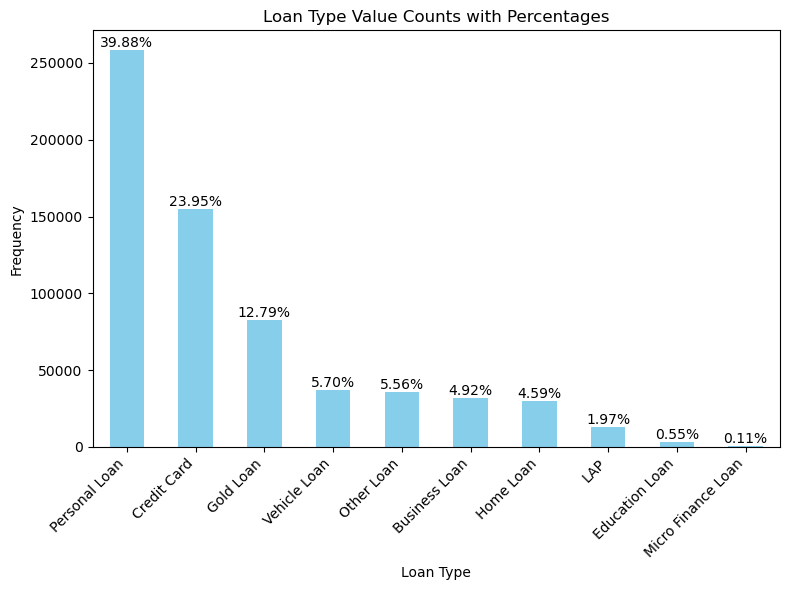

In [2380]:
# Assuming df is your DataFrame and 'Loan_Type' is a column in it
import warnings 
warnings.filterwarnings('ignore')
loan_type_counts = df_copy['Loan_Type'].value_counts()

# Calculate percentage for each loan type
loan_type_percentages = (loan_type_counts / loan_type_counts.sum()) * 100

# Plotting the value counts as a bar chart
plt.figure(figsize=(8,6))
ax = loan_type_counts.plot(kind='bar', color='skyblue')

# Adding percentages on top of the bars
for i, count in enumerate(loan_type_counts):
    percentage = loan_type_percentages[i]
    ax.text(i, count + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

# Adding titles and labels
plt.title('Loan Type Value Counts with Percentages')
plt.xlabel('Loan Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


In [2599]:
num_cols = ['Balance', 'Sanction_Amount', 'Credit_Limit', 'Installment_Amount', 'Past_Due_Amount',
       'Repayment_Tenure',"Last_Payment_Amount","Credit_Score","Annual_Income"]
date_cols = ['Date_Opened', 'Date_Closed',"Last_Payment_Date"]
cat_cols = ['Loan_Type',"Terms_Frequency",'Ownership_Type',"Gender","City_Rank"]

In [2611]:
df_eda.describe()

,ID,Balance,Sanction_Amount,Credit_Limit,Date_Opened,Date_Closed,Installment_Amount,Past_Due_Amount,Repayment_Tenure,Last_Payment_Amount,Last_Payment_Date,Credit_Score,Annual_Income,City_Rank_Encoded,Occ_1.0,Occ_2.0,Occ_3.0
count,647603,647603,647603,630151,647603,390462,647603,647603,205033,647603,587393,647603,646228,647603,647603,647603,647603
mean,84822,201555,1118927,30763,2020-02-21 13:52:53.950090496,2020-09-23 20:34:10.125236992,4242,2710,63,37811,2021-09-13 07:32:02.774701568,742,1316530,2,1,0,0
min,60001,0,0,0,1981-11-01 00:00:00,1998-01-09 00:00:00,0,0,1,0,1998-07-13 00:00:00,300,50000,1,0,0,0
25%,72345,0,14000,0,2018-04-24 00:00:00,2019-02-16 00:00:00,0,0,10,0,2020-02-09 00:00:00,722,530000,1,0,0,0
50%,84414,0,51000,0,2021-03-20 00:00:00,2021-08-16 00:00:00,0,0,18,0,2022-11-01 00:00:00,780,800000,1,1,0,0
75%,97721,8820,200000,0,2023-01-16 00:00:00,2023-03-31 00:00:00,0,0,60,0,2024-04-26 00:00:00,816,1300000,3,1,1,0
max,110497,415899172,100000000000,3000000,2024-06-30 00:00:00,2024-06-30 00:00:00,16055737,71178503,200000,999999999,2024-08-31 00:00:00,900,280000000,3,1,1,1
std,14580,1835075,235283434,102450,NaN,NaN,51141,136810,901,1833408,NaN,116,2821911,1,0,0,0


**Findings**-
* *Balance* - 75% of values of balance are below 8820
* *Sanction Amount* - It seems that majority of values are around 50k to 2lakh rs (50%tile = 51,000 and 75%tile - 2 lakh)
* *Dates*- The date range is from 1988 to 2024
* *Repayement Tenure* - It seems that majority of loans(75%tile) are under 5 years tenure

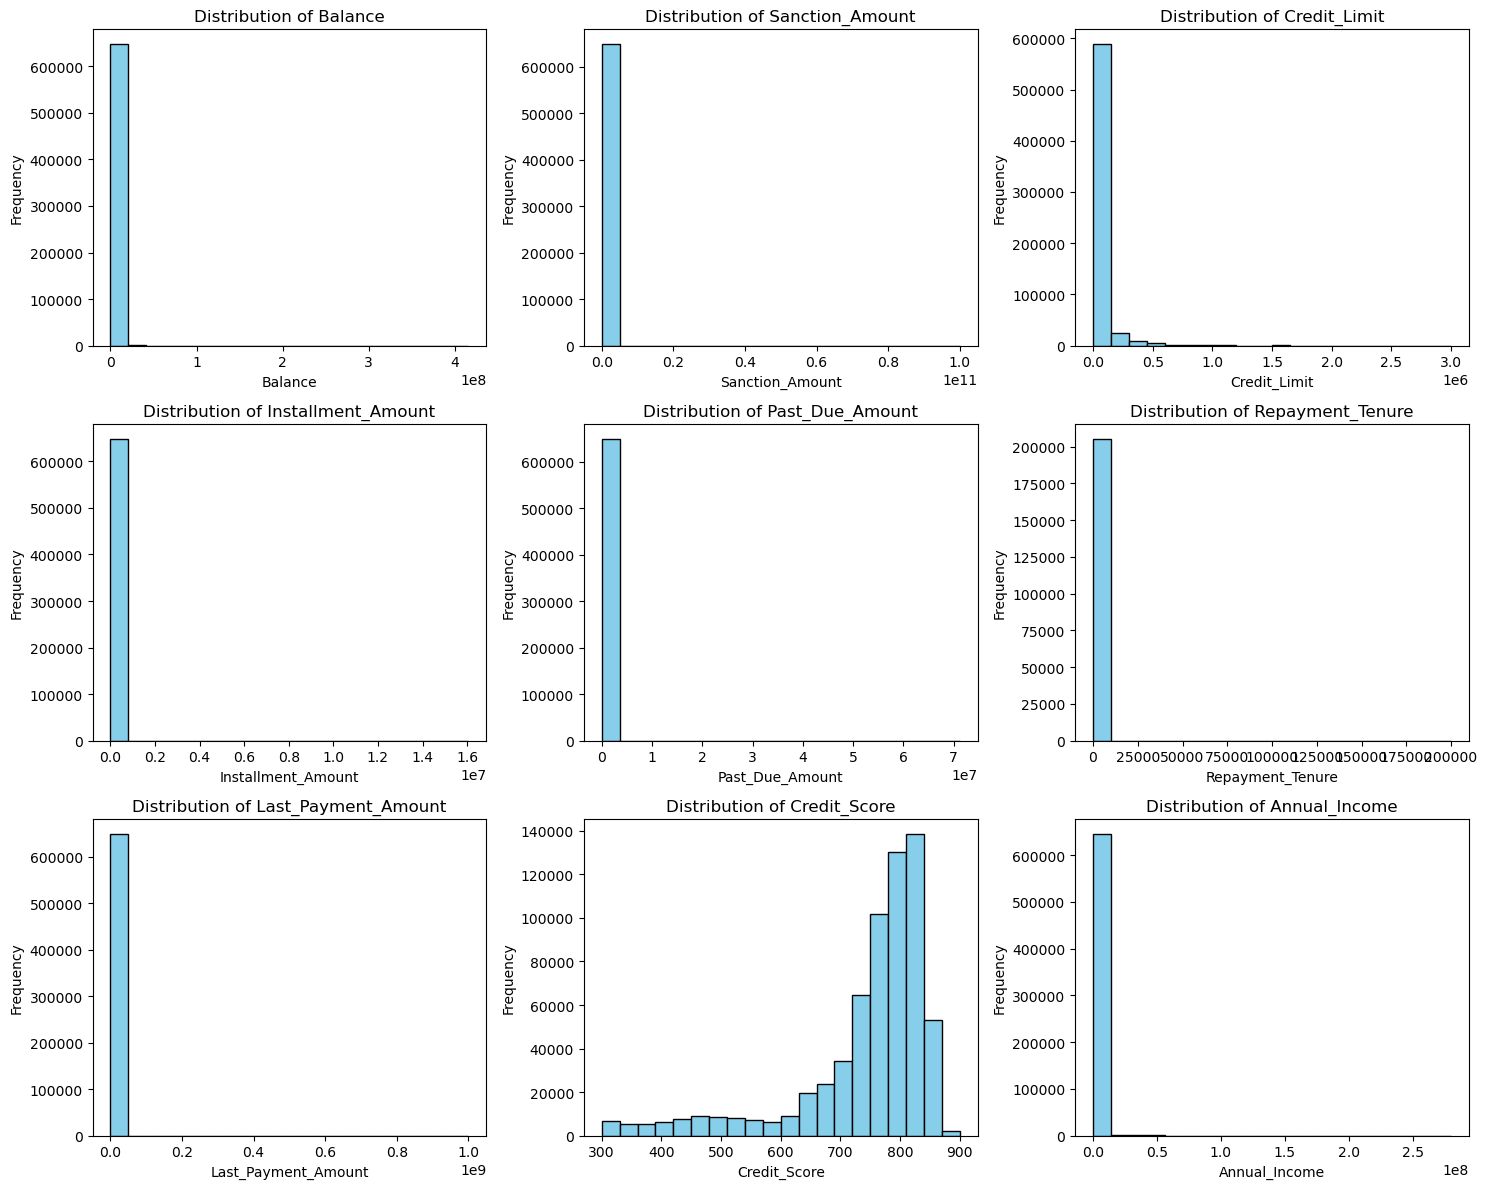

In [2607]:
import matplotlib.pyplot as plt

# Set the number of columns for the subplot layout
num_cols_per_row = 3

# Calculate the number of rows needed based on the number of numerical columns
num_rows = (len(num_cols) + num_cols_per_row - 1) // num_cols_per_row

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 4 * num_rows))  # Adjust figsize for 3 graphs
axs = axs.flatten()  # Flatten the array of axes for easy indexing

# Loop through each column in num_cols and plot a histogram
for i, col in enumerate(num_cols):
    axs[i].hist(df_eda[col], bins=20, color='skyblue', edgecolor='black')  # Plot the histogram
    axs[i].set_title(f'Distribution of {col}', fontsize=12)  # Set the title
    axs[i].set_xlabel(col, fontsize=10)  # Label for x-axis
    axs[i].set_ylabel('Frequency', fontsize=10)  # Label for y-axis
    axs[i].grid(False)  # Optional: remove gridlines

# Hide any unused subplots (if num_cols is not a multiple of 3)
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


**Finding**
* *All the cols in num_cols except Credit_Score needs transformation as they have high Outlier values*

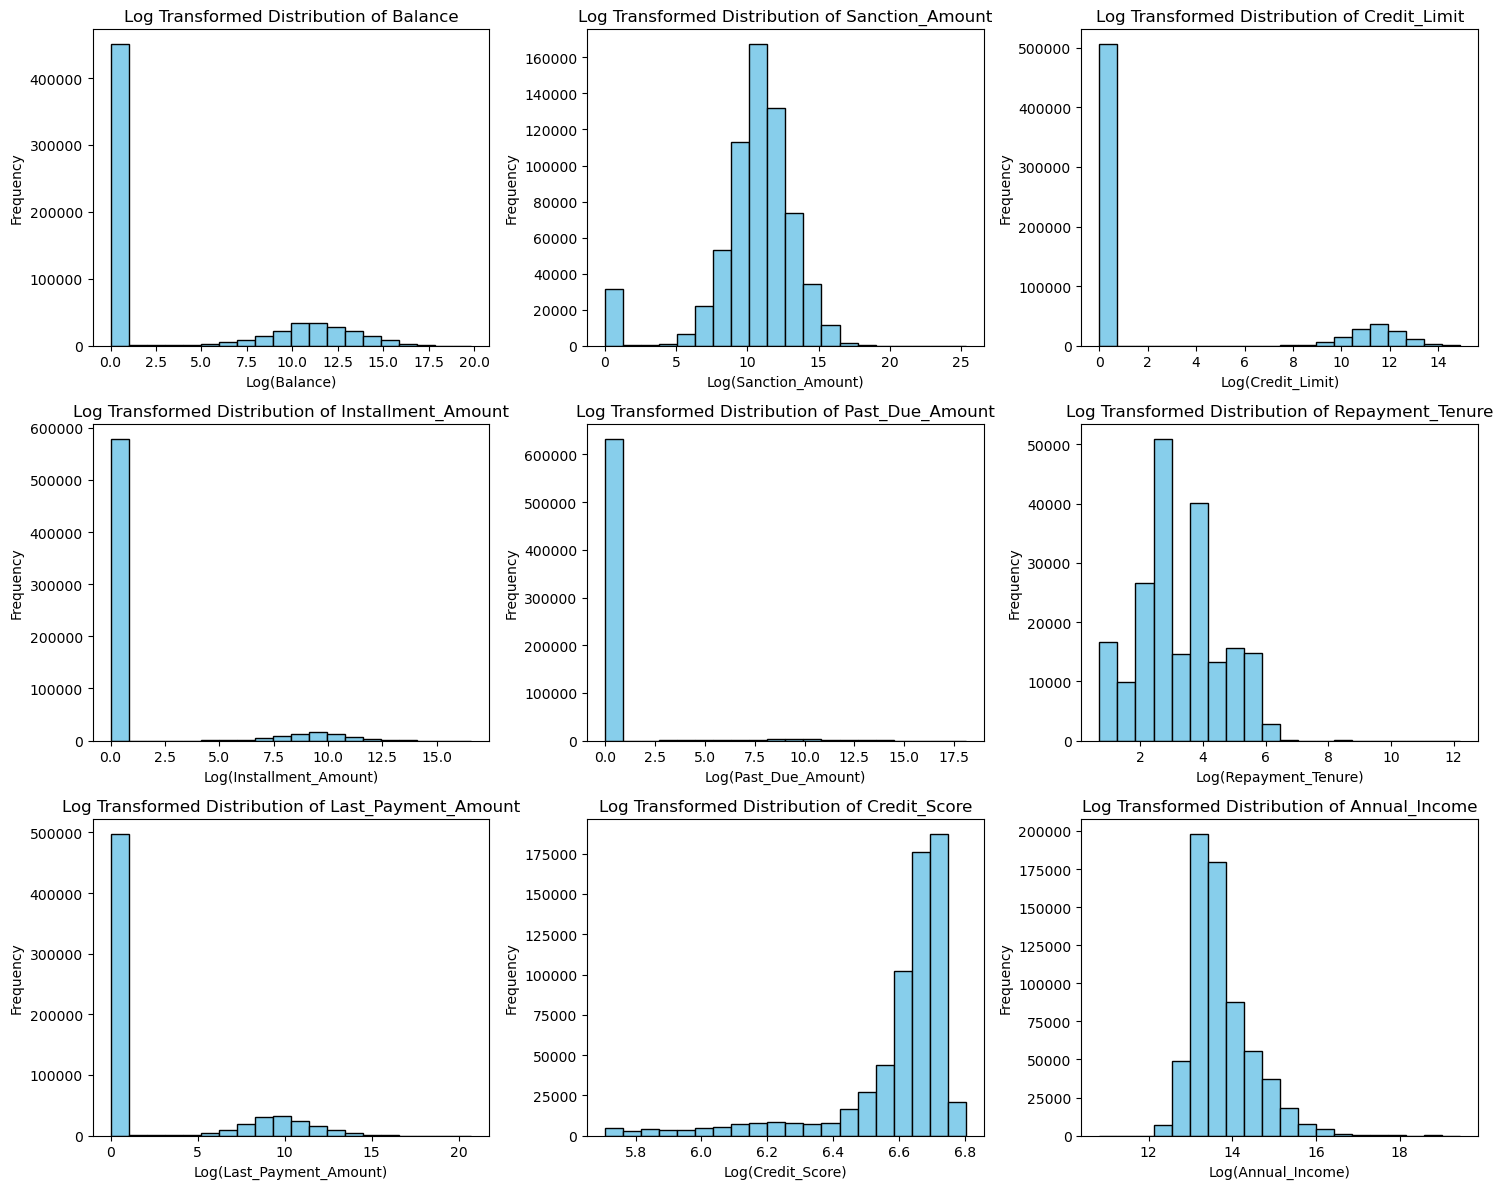

In [2605]:

# Create a new figure for the log-transformed histograms
num_cols_per_row = 3
num_rows = (len(num_cols) + num_cols_per_row - 1) // num_cols_per_row

# Create subplots for log-transformed data
fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 4 * num_rows))
axs = axs.flatten()  # Flatten the array of axes for easy indexing

# Loop through each column, apply log transformation, and plot a histogram
for i, col in enumerate(num_cols):
    log_transformed_col = df_eda[col].apply(lambda x: np.log1p(x))  # Apply log1p transformation
    axs[i].hist(log_transformed_col, bins=20, color='skyblue', edgecolor='black')  # Plot the histogram
    axs[i].set_title(f'Log Transformed Distribution of {col}', fontsize=12)  # Set the title
    axs[i].set_xlabel(f'Log({col})', fontsize=10)  # Label for x-axis
    axs[i].set_ylabel('Frequency', fontsize=10)  # Label for y-axis
    axs[i].grid(False)  # Optional: remove gridlines

# Hide any unused subplots (if num_cols is not a multiple of 3)
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


**Findings**
* *Balance* - High zero values, meaning majority of the loan in the dataset is inactive
* *Sanction_Amount* - This seems normally distributed after transformation. But also has high number of 0 values. Probably due to credit card or some other loan types where sanction is not required.
* *Credit Limit*- High number of 0 values as, credit limit is only for valid for credit loan types(supporting analysis)
* *Installment_Amount* - Majority of Installment_Amount is 0. But (supporting analysis)
* *Past_Due_Amount* - Majority of past due amount is 0
* *Repayment Tenure* - It does not follow normal distribution and is left skewed.
* *Last Amount Paid* - Majority of values seems 0.(Supporting Analysis)
* *Credit Score* - It is rightly skewed.
* *Annual Income* - *Nearly normal distribution after distribution*

### Indepth Findings

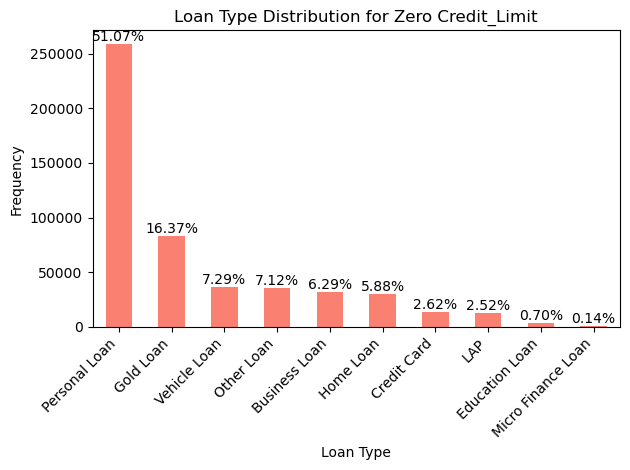

In [2466]:
loan_type_zero_sanction = df_eda[df_eda["Credit_Limit"] == 0]["Loan_Type"].value_counts()

# Plotting the value counts as a bar chart
#plt.figure(figsize=(8,6))
ax = loan_type_zero_sanction.plot(kind='bar', color='salmon')

# Adding percentages on top of the bars
total_zero_sanctions = loan_type_zero_sanction.sum()
for i, count in enumerate(loan_type_zero_sanction):
    percentage = (count / total_zero_sanctions) * 100
    ax.text(i, count + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

# Adding titles and labels
plt.title('Loan Type Distribution for Zero Credit_Limit')
plt.xlabel('Loan Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


*We find that personal Loan has high number of 0 values, this may be due the instant personal loan scheme which gives loan without checking credit limit*

In [2523]:
loan_type_zero_sanction = df_eda[(df_eda["Credit_Limit"] == 0)&(df_eda["Loan_Type"]== "Personal Loan")]
loan_type_zero_sanction.Sanction_Amount.median()

22999.0

*Our hypothesis proves right*

##### Sanction Amount

**Findings**
* There seems to be large outliers, which would need transformation while modelling
* There also seems to some number of 0 values that are majorly assocaiated with loan_types
* Credit Card generally do not have pre defined sanction amount but have credit limits. Also personal loan have pre defined sanction amount according to income level(this might help in modelling).

*Can these large number of 0 values associated with any loan type?*

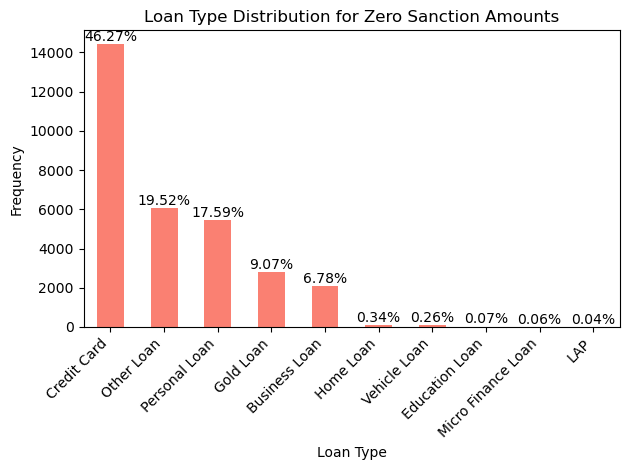

In [2446]:
loan_type_zero_sanction = df_eda[df_eda["Sanction_Amount"] == 0]["Loan_Type"].value_counts()

# Plotting the value counts as a bar chart
#plt.figure(figsize=(8,6))
ax = loan_type_zero_sanction.plot(kind='bar', color='salmon')

# Adding percentages on top of the bars
total_zero_sanctions = loan_type_zero_sanction.sum()
for i, count in enumerate(loan_type_zero_sanction):
    percentage = (count / total_zero_sanctions) * 100
    ax.text(i, count + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

# Adding titles and labels
plt.title('Loan Type Distribution for Zero Sanction Amounts')
plt.xlabel('Loan Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


*Credit Card generally do not have pre defined sanction amount but have credit limits. Also personal loan have pre defined sanction amount according to income level(this might help in modelling).*

### Bivariate Analysis

*For each column first we will check how it has a relationship with target variable, then we will see its relationship with other independent variable*

### Correlation function of aggregated continuous column

In [3171]:
import pandas as pd
from scipy.stats import pearsonr

def analyze_continuous_correlation(df, continuous_column):
    """
    Analyzes the correlation between a specified continuous column and Annual Income.
    
    Parameters:
    - df: DataFrame containing the data.
    - continuous_column: The name of the continuous column to analyze.
    
    Returns:
    - None
    """
    # Copy the original DataFrame
    df_continuous = df.copy()
    
    # Drop rows with NaN values in the specified continuous column or in 'Annual_Income'
    df_continuous = df_continuous.dropna(subset=[continuous_column, "Annual_Income"])
    
    # Group by 'ID' and calculate mean, median, and max for the continuous column
    df_continuous_agg = df_continuous.groupby('ID')[continuous_column].agg(['mean', 'median', 'max']).reset_index()
    
    # Rename columns for clarity
    df_continuous_agg.columns = ['ID', f'mean_{continuous_column}', f'median_{continuous_column}', f'max_{continuous_column}']
    
    # Merge aggregated statistics with the original DataFrame
    df_continuous = pd.merge(df_continuous, df_continuous_agg, on='ID', how='left')
    
    # Drop duplicates by keeping only the first occurrence of each ID
    df_continuous_unique = df_continuous.drop_duplicates(subset='ID')
    
    # Select relevant columns for correlation analysis
    df_continuous_unique = df_continuous_unique[[f'mean_{continuous_column}', f'median_{continuous_column}', f'max_{continuous_column}', 'Annual_Income']]
    
    # Calculate Pearson correlation coefficients
    corr_max, _ = pearsonr(df_continuous_unique[f'max_{continuous_column}'], df_continuous_unique['Annual_Income'])
    corr_mean, _ = pearsonr(df_continuous_unique[f'mean_{continuous_column}'], df_continuous_unique['Annual_Income'])
    corr_median, _ = pearsonr(df_continuous_unique[f'median_{continuous_column}'], df_continuous_unique['Annual_Income'])
    
    # Print the correlation coefficients
    print(f"{continuous_column.capitalize()}: Corr_of_Max_{continuous_column} : {corr_max:.3f}, Corr_of_Mean_{continuous_column}: {corr_mean:.3f}, Corr_of_Median_{continuous_column}: {corr_median:.3f}")

# Example usage
# analyze_continuous_correlation(df_eda, 'Last_Payment_Amount')


In [3158]:
#'Sanction_Amount
analyze_continuous_correlation(df_eda,"Sanction_Amount")
analyze_continuous_correlation(df_eda,"Credit_Limit")


Sanction_amount: Corr_of_Max_Sanction_Amount : 0.0193, Corr_of_Mean_Sanction_Amount: 0.0190, Corr_of_Median_Sanction_Amount: 0.0207
Credit_limit: Corr_of_Max_Credit_Limit : 0.2180, Corr_of_Mean_Credit_Limit: 0.1623, Corr_of_Median_Credit_Limit: 0.0732


In [3140]:
df_eda.columns

Index(['ID', 'Loan_Type', 'Balance', 'Sanction_Amount', 'Credit_Limit',
       'Date_Opened', 'Date_Closed', 'Installment_Amount', 'Past_Due_Amount',
       'Repayment_Tenure', 'Terms_Frequency', 'Ownership_Type',
       'Last_Payment_Amount', 'Last_Payment_Date', 'Credit_Score', 'Gender',
       'Pincode', 'Annual_Income', 'City_Rank', 'City_Rank_Encoded', 'Occ_1.0',
       'Occ_2.0', 'Occ_3.0'],
      dtype='object')

### Categorical columns chart function

In [3112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_median_income_by_category(df, categorical_column):
    """
    Plots median annual income for each category in the specified categorical column.

    Parameters:
    - df: DataFrame containing the data.
    - categorical_column: The name of the categorical column to group by.
    """
    # Group by the specified categorical column and calculate the median income
    median_income_per_category = df.groupby(categorical_column)['Annual_Income'].median().reset_index()

    # Plotting using seaborn
    plt.figure(figsize=(8, 6))
    bar_plot = sns.barplot(x=categorical_column, y='Annual_Income', data=median_income_per_category, palette='viridis')

    # Adding titles and labels
    plt.title(f'Median Annual Income for Each {categorical_column}', fontsize=16)
    plt.xlabel(categorical_column, fontsize=12)
    plt.ylabel('Median Annual Income', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Annotating the bars with median values
    for index, row in median_income_per_category.iterrows():
        bar_plot.text(index, row['Annual_Income'] + 1000, round(row['Annual_Income'], 2), 
                      color='black', ha="center", fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
# plot_median_income_by_category(df_eda, 'Terms_Frequency')


### Anova Function

In [3103]:
import pandas as pd
from scipy import stats

def perform_anova(df, categorical_column, target_column):
    """
    Performs a one-way ANOVA test to check if the specified categorical column 
    has a significant effect on the target column.

    Parameters:
    - df: DataFrame containing the data.
    - categorical_column: The name of the categorical column to group by.
    - target_column: The name of the target column for analysis.

    Returns:
    - None
    """
    # Perform one-way ANOVA
    anova_result = stats.f_oneway(*[df[df[categorical_column] == category][target_column].dropna() 
                                      for category in df[categorical_column].unique()])

    # Print ANOVA result
    print("ANOVA F-statistic:", anova_result.statistic)
    print("ANOVA p-value:", anova_result.pvalue)

    # Interpretation
    if anova_result.pvalue < 0.05:
        print("Reject the null hypothesis. The categorical column has a significant effect on the target column.")
    else:
        print("Fail to reject the null hypothesis. The categorical column does not have a significant effect on the target column.")

# Example usage
# perform_anova(df_eda, 'Loan_Type', 'Annual_Income')


In [2626]:
df_eda.columns

Index(['ID', 'Loan_Type', 'Balance', 'Sanction_Amount', 'Credit_Limit',
       'Date_Opened', 'Date_Closed', 'Installment_Amount', 'Past_Due_Amount',
       'Repayment_Tenure', 'Terms_Frequency', 'Ownership_Type',
       'Last_Payment_Amount', 'Last_Payment_Date', 'Credit_Score', 'Gender',
       'Pincode', 'Annual_Income', 'City_Rank', 'City_Rank_Encoded', 'Occ_1.0',
       'Occ_2.0', 'Occ_3.0'],
      dtype='object')

### Loan Type

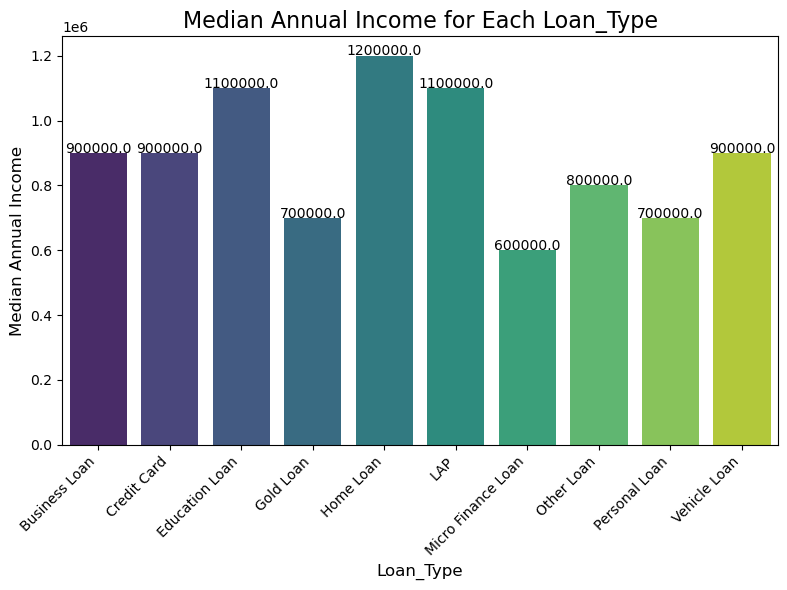

In [3117]:
plot_median_income_by_category(df_eda,"Loan_Type")

**ANOVA to check significant difference in mean**

In [3119]:
perform_anova(df_eda, "Loan_Type", "Annual_Income")

ANOVA F-statistic: 760.4208225328065
ANOVA p-value: 0.0
Reject the null hypothesis. The categorical column has a significant effect on the target column.


### Balance

*Does balance have any affect on Annual Income?*

*We will aggregate balance of each ID using mean,median,max and see if there is a relationship with Annual Income* 

In [2927]:
df_balance = df_eda.copy()

In [3160]:
analyze_continuous_correlation(df_eda,"Balance")


Balance: Corr_of_Max_Balance : 0.1531, Corr_of_Mean_Balance: 0.0469, Corr_of_Median_Balance: 0.0078


*We dont see any significant relationship with Annual Income other than **max balance***

In [2931]:
df_balance= df_balance.dropna(subset = ["Annual_Income"])
df_balance_agg = df_balance.groupby('ID')['Balance'].agg(['mean', 'median', 'max']).reset_index()

# Rename columns for clarity
df_balance_agg.columns = ['ID', 'mean_balance', 'median_balance', 'max_balance']

# Merge aggregated balance statistics with original DataFrame
df_balance = pd.merge(df_balance, df_balance_agg, on='ID', how='left')
# Drop duplicates by keeping only the first occurrence of each ID
df_balance_unique = df_balance.drop_duplicates(subset='ID')
df_balance_unique = df_balance_unique[["mean_balance","median_balance","max_balance","Annual_Income"]]


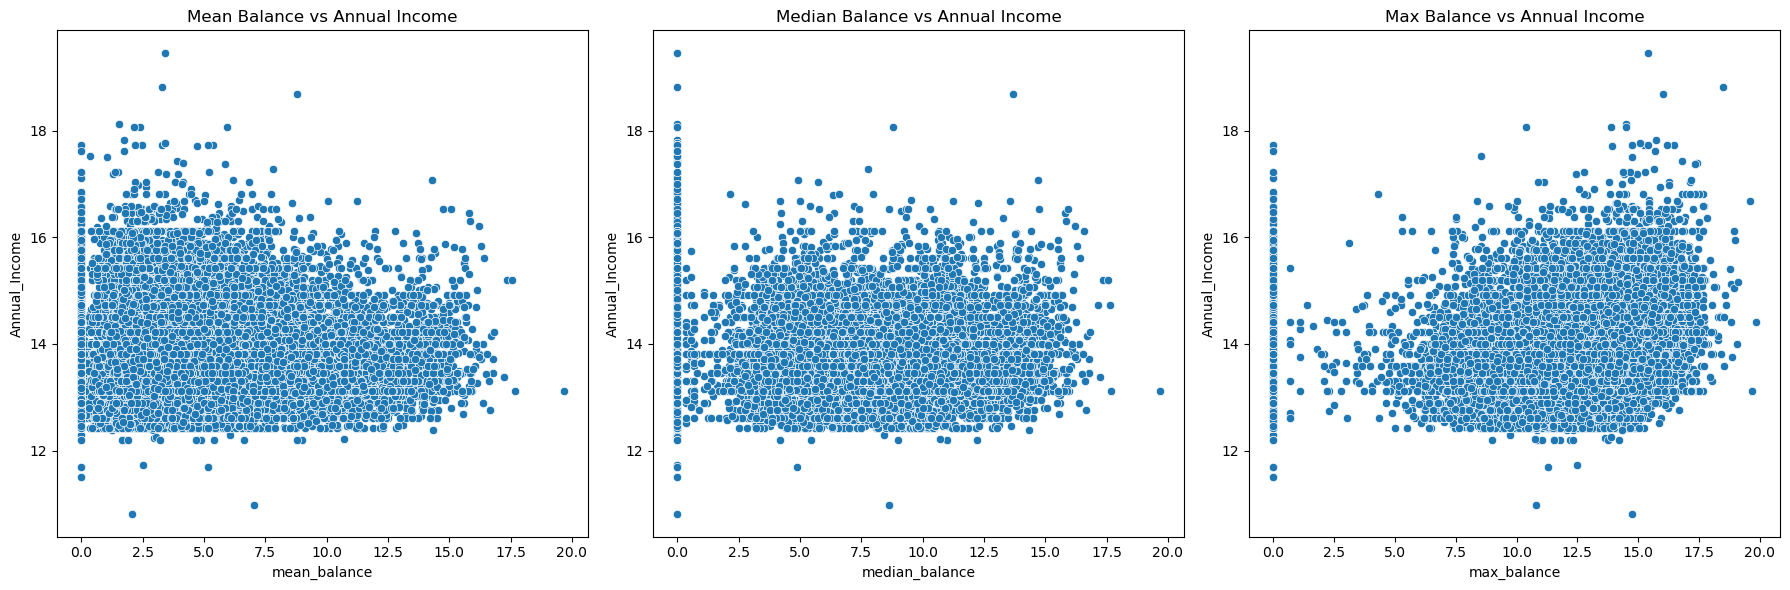

In [2933]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# Scatter plot for mean balance vs Annual Income
plt.subplot(1, 3, 1)
sns.scatterplot(x='mean_balance', y='Annual_Income', data=df_balance_unique)
plt.title('Mean Balance vs Annual Income')

# Scatter plot for median balance vs Annual Income
plt.subplot(1, 3, 2)
sns.scatterplot(x='median_balance', y='Annual_Income', data=df_balance_unique)
plt.title('Median Balance vs Annual Income')

# Scatter plot for max balance vs Annual Income
plt.subplot(1, 3, 3)
sns.scatterplot(x='max_balance', y='Annual_Income', data = df_balance_unique)
plt.title('Max Balance vs Annual Income')

plt.tight_layout()
plt.show()


### Sanction_Amount

In [2717]:
# Aggregating balance for each ID using mean, median, and max
df_sanction_agg = df_temp.groupby('ID')['Sanction_Amount'].agg(['mean', 'median', 'max']).reset_index()

# Rename columns for clarity
df_sanction_agg.columns = ['ID', 'mean_sanction', 'median_sanction', 'max_sanction']

# Merge aggregated balance statistics with original DataFrame
df_sanction = pd.merge(df_temp, df_sanction_agg, on='ID', how='left')
# Drop duplicates by keeping only the first occurrence of each ID
df_sanction_unique = df_sanction.drop_duplicates(subset='ID')


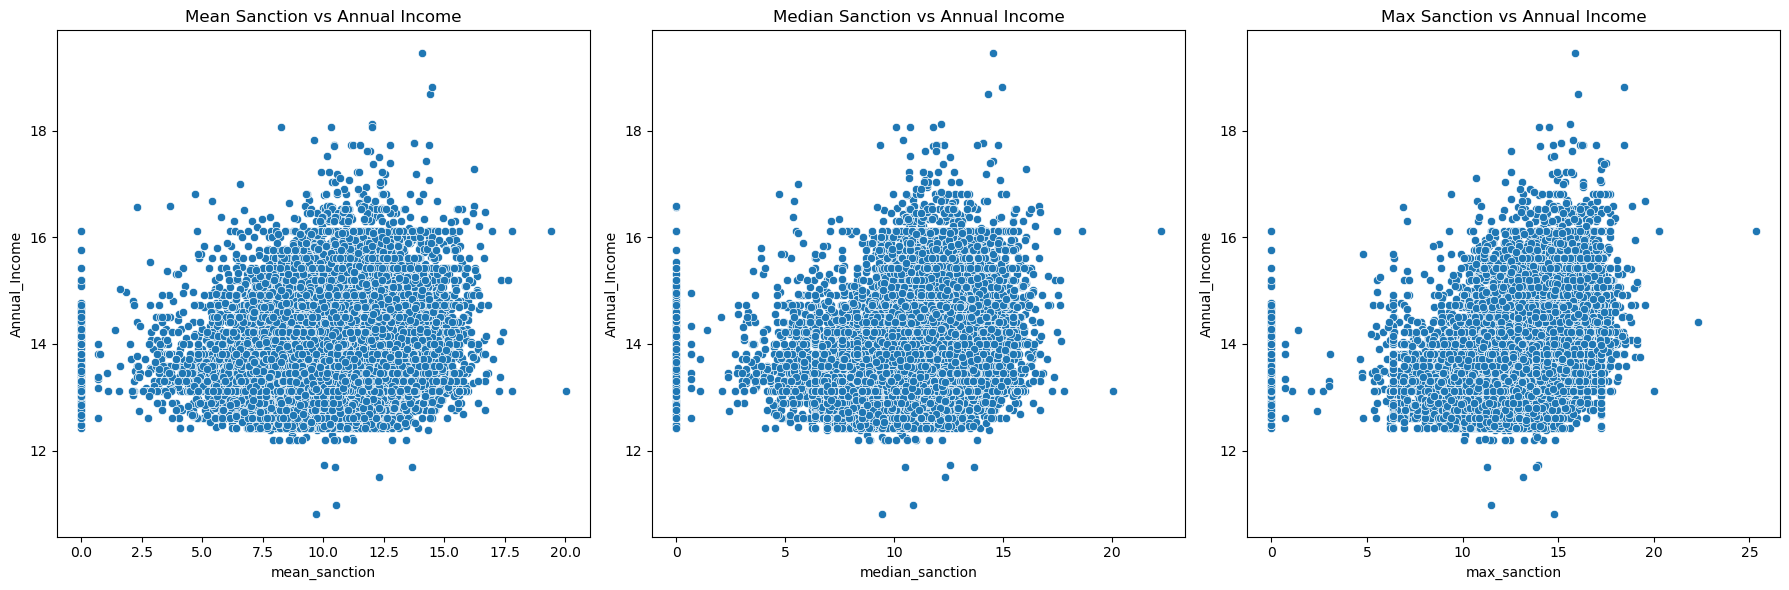

In [2874]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# Scatter plot for mean balance vs Annual Income
plt.subplot(1, 3, 1)
sns.scatterplot(x='mean_sanction', y='Annual_Income', data=df_sanction_unique)
plt.title('Mean Sanction vs Annual Income')

# Scatter plot for median balance vs Annual Income
plt.subplot(1, 3, 2)
sns.scatterplot(x='median_sanction', y='Annual_Income', data=df_sanction_unique)
plt.title('Median Sanction vs Annual Income')

# Scatter plot for max balance vs Annual Income
plt.subplot(1, 3, 3)
sns.scatterplot(x='max_sanction', y='Annual_Income', data = df_sanction_unique)
plt.title('Max Sanction vs Annual Income')

plt.tight_layout()
plt.show()


In [3165]:
analyze_continuous_correlation(df_eda,"Sanction_Amount")


Sanction_amount: Corr_of_Max_Sanction_Amount : 0.0193, Corr_of_Mean_Sanction_Amount: 0.0190, Corr_of_Median_Sanction_Amount: 0.0207


***Sanction Amount does not have relationship with annual_Income***

*Let us find out if it has higher relationship with combination of Loan Type*

In [2973]:
columns_to_corr = [
    'max_sanction_Micro Finance Loan',
    'max_sanction_Business Loan',
    'max_sanction_LAP',
    'max_sanction_Gold Loan',
    'max_sanction_Education Loan',
    'max_sanction_Other Loan',
    'max_sanction_Vehicle Loan',
    'max_sanction_Home Loan',
    'max_sanction_Personal Loan',
    'Annual_Income'
]

# Calculate and store the Pearson correlation coefficients
corr_results = {}
for col in loan_columns:
    corr_coefficient, p_value = pearsonr(chk[col], chk['Annual_Income'])
    corr_results[col] = (corr_coefficient, p_value)

# Display the results
for key, value in corr_results.items():
    print(f"Correlation between {key} and Annual Income: Coefficient = {value[0]:.4f}, p-value = {value[1]:.4f}")


Correlation between max_sanction_Micro Finance Loan and Annual Income: Coefficient = -0.0445, p-value = 0.0000
Correlation between max_sanction_Business Loan and Annual Income: Coefficient = -0.0280, p-value = 0.0000
Correlation between max_sanction_LAP and Annual Income: Coefficient = 0.1743, p-value = 0.0000
Correlation between max_sanction_Gold Loan and Annual Income: Coefficient = -0.1081, p-value = 0.0000
Correlation between max_sanction_Education Loan and Annual Income: Coefficient = 0.1018, p-value = 0.0000
Correlation between max_sanction_Other Loan and Annual Income: Coefficient = 0.0164, p-value = 0.0005
Correlation between max_sanction_Vehicle Loan and Annual Income: Coefficient = 0.1147, p-value = 0.0000
Correlation between max_sanction_Home Loan and Annual Income: Coefficient = 0.3458, p-value = 0.0000
Correlation between max_sanction_Personal Loan and Annual Income: Coefficient = -0.0428, p-value = 0.0000


*Some of the value does seem to have an effect on correlation*

**Plot**

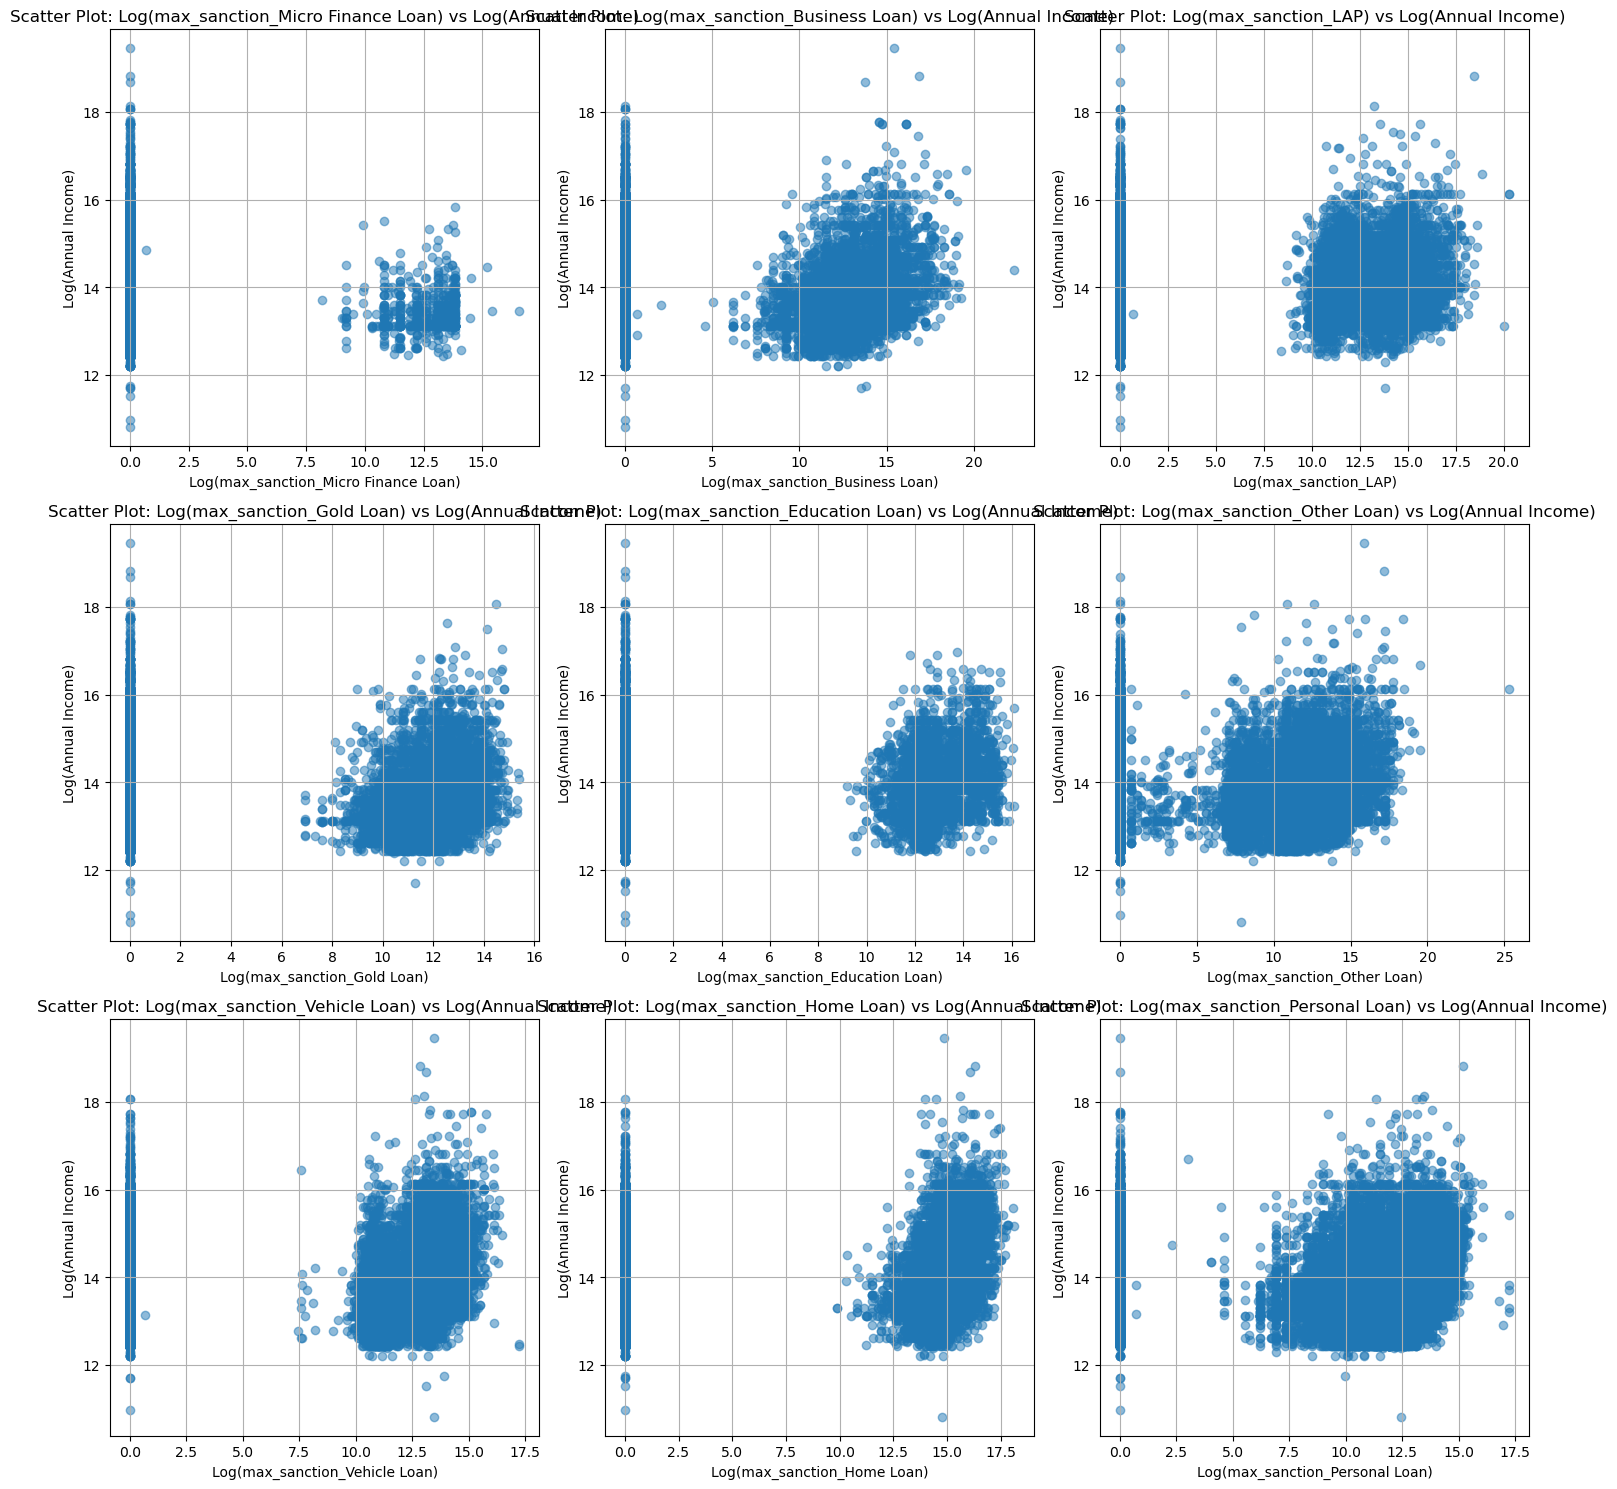

In [2949]:
chk = df_final[["max_sanction_Micro Finance Loan", "max_sanction_Business Loan",
    "max_sanction_LAP", "max_sanction_Gold Loan",
    "max_sanction_Education Loan", "max_sanction_Other Loan",
    "max_sanction_Vehicle Loan", "max_sanction_Home Loan",
    "max_sanction_Personal Loan","Annual_Income"]]
# Define the columns for max sanctions
loan_columns = [
    "max_sanction_Micro Finance Loan", "max_sanction_Business Loan",
    "max_sanction_LAP", "max_sanction_Gold Loan",
    "max_sanction_Education Loan", "max_sanction_Other Loan",
    "max_sanction_Vehicle Loan", "max_sanction_Home Loan",
    "max_sanction_Personal Loan"
]

# Add a small constant to handle zeros and apply log transformation
for col in loan_columns:
    chk[col] = np.log1p(chk[col])  # log1p handles zero by using log(1 + x)

# Log transform Annual Income as well to maintain consistency
chk['Annual_Income'] = np.log1p(chk['Annual_Income'])

# Set up the plotting environment
plt.figure(figsize=(15, 15))  # Adjust figure size as needed

# Create scatter plots for each loan type against Annual Income
for i, col in enumerate(loan_columns):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns
    plt.scatter(chk[col], chk["Annual_Income"], alpha=0.5)
    plt.title(f'Scatter Plot: Log({col}) vs Log(Annual Income)')
    plt.xlabel(f'Log({col})')
    plt.ylabel('Log(Annual Income)')
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


### Credit Limit

In [3167]:
analyze_continuous_correlation(df_eda,"Credit_Limit")


Credit_limit: Corr_of_Max_Credit_Limit : 0.2180, Corr_of_Mean_Credit_Limit: 0.1623, Corr_of_Median_Credit_Limit: 0.0732


**Max credit has a weak correlation**

### Date Columns

In [3025]:
# Days_to_Close, mean, max or median?

In [3049]:
df_date = df_eda.copy()
df_date = df_credit.dropna(subset = ["Annual_Income"])

In [3057]:
df_date['Date_Opened'] = pd.to_datetime(df_date['Date_Opened'])
df_date['Date_Closed'] = pd.to_datetime(df_date['Date_Closed'])

# Calculate date difference
# If date_closed is NaT (not a time), use 0 as the difference
df_date['date_diff'] = (df_date['Date_Closed'] - df_date['Date_Opened']).dt.days.fillna(0).astype(int)

In [3059]:
# Group by ID and perform mean, median, max aggregation
result = df_date.groupby('ID')['date_diff'].agg(['mean', 'median', 'max']).reset_index()

# Rename columns for clarity
result.columns = ['ID', 'mean_date_diff', 'median_date_diff', 'max_date_diff']


In [3064]:
df_date = pd.merge(df_date, result, on='ID', how='left')
# Drop duplicates by keeping only the first occurrence of each ID
df_date_unique = df_date.drop_duplicates(subset='ID')
corr1, _ = pearsonr(df_date_unique['max_date_diff'], df_date_unique['Annual_Income'])
corr2, _ = pearsonr(df_date_unique['mean_date_diff'], df_date_unique['Annual_Income'])
corr3, _ = pearsonr(df_date_unique['median_date_diff'], df_date_unique['Annual_Income'])

print(f"Pearson correlation: {corr1},{corr2},{corr3}")


Pearson correlation: 0.168586923122552,0.157595515588257,0.10195997508105142


**Max Date/Mean Date diff  does seem to have a slight correlation**

### Installment_Amount', 'Past_Due_Amount', 'Repayment_Tenure', 'Last_Payment_Amount'

In [3176]:
cols = ['Installment_Amount', 'Past_Due_Amount', 'Repayment_Tenure', 'Last_Payment_Amount']
for col in cols:
    analyze_continuous_correlation(df_eda,col)
    print("")


Installment_amount: Corr_of_Max_Installment_Amount : 0.045, Corr_of_Mean_Installment_Amount: 0.017, Corr_of_Median_Installment_Amount: 0.003

Past_due_amount: Corr_of_Max_Past_Due_Amount : 0.016, Corr_of_Mean_Past_Due_Amount: 0.018, Corr_of_Median_Past_Due_Amount: -0.003

Repayment_tenure: Corr_of_Max_Repayment_Tenure : 0.013, Corr_of_Mean_Repayment_Tenure: 0.054, Corr_of_Median_Repayment_Tenure: 0.137

Last_payment_amount: Corr_of_Max_Last_Payment_Amount : 0.022, Corr_of_Mean_Last_Payment_Amount: 0.016, Corr_of_Median_Last_Payment_Amount: 0.000



**We see that no significant correlation in any of them**

### Term Frequency

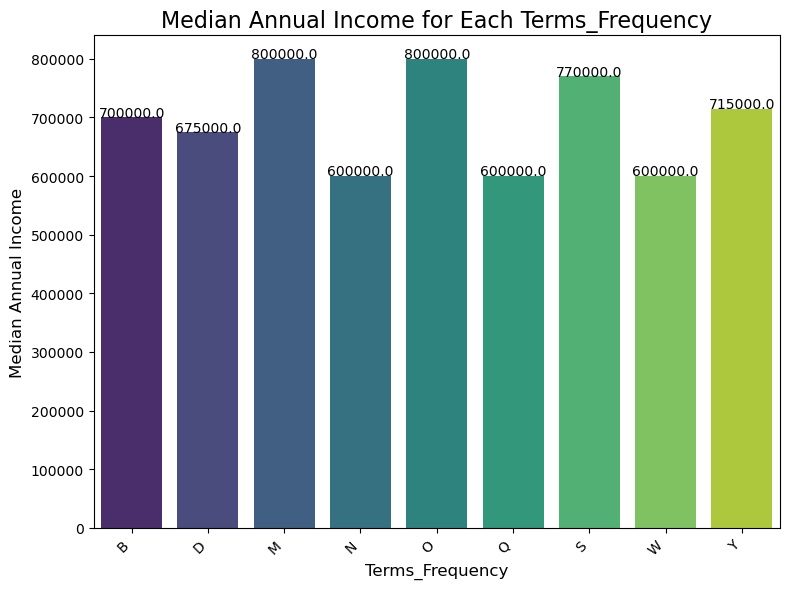

In [3121]:
plot_median_income_by_category(df_eda,"Terms_Frequency")

In [3109]:
perform_anova(df_tf,"Terms_Frequency","Annual_Income")

ANOVA F-statistic: 54.3828125000358
ANOVA p-value: 6.29091310214951e-89
Reject the null hypothesis. The categorical column has a significant effect on the target column.


### Ownership

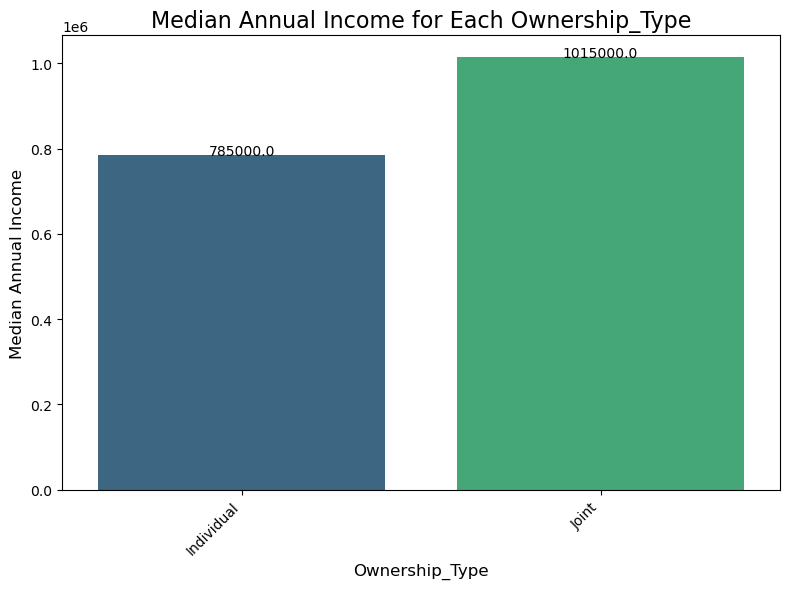

In [3125]:
plot_median_income_by_category(df_eda,"Ownership_Type")

In [3129]:
perform_anova(df_eda, "Ownership_Type", "Annual_Income")

ANOVA F-statistic: 3285.8209532552487
ANOVA p-value: 0.0
Reject the null hypothesis. The categorical column has a significant effect on the target column.


### City_Rank

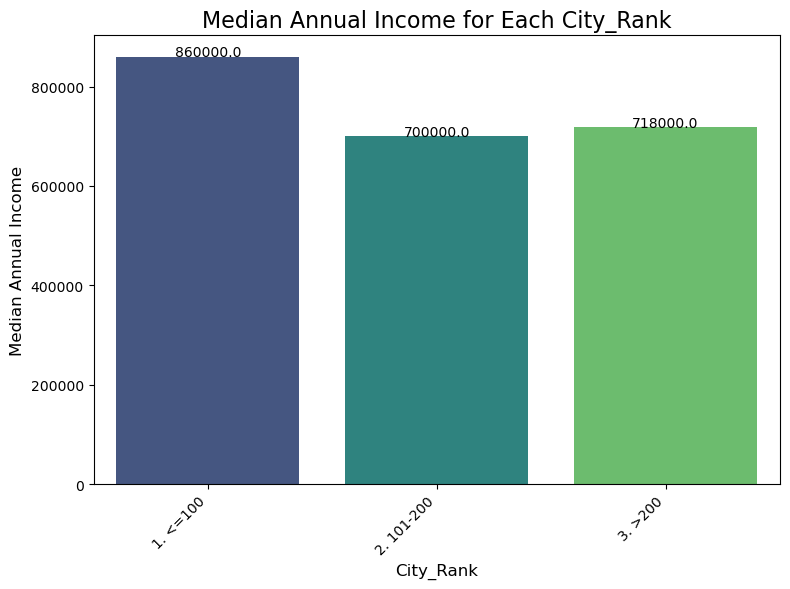

In [3132]:
plot_median_income_by_category(df_eda,"City_Rank")

In [3134]:
perform_anova(df_eda, "City_Rank", "Annual_Income")

ANOVA F-statistic: 1885.9227099033674
ANOVA p-value: 0.0
Reject the null hypothesis. The categorical column has a significant effect on the target column.


## Modelling

In [3394]:
df_agg["ID"].nunique()

45764

In [3396]:
df_model = df_agg.copy()

In [3398]:
# Create a new DataFrame with the first row for each unique ID
df_model = df_model.drop_duplicates(subset='ID', keep='first')

In [3400]:
df_final = pd.merge(df_model,df_income,on = "ID",how = "left")

In [3402]:
df_final.columns

Index(['ID', 'Loan_Type', 'Balance', 'Sanction_Amount', 'Credit_Limit',
       'Date_Opened', 'Date_Closed', 'Installment_Amount', 'Past_Due_Amount',
       'Repayment_Tenure', 'Terms_Frequency', 'Ownership_Type',
       'Last_Payment_Amount', 'Last_Payment_Date', 'Credit_Score',
       'active_loan', 'Total_Active_Loan', '%active_loans', 'Days_to_Close',
       'num_Personal Loan', 'max_sanction_Personal Loan',
       'max_days_to_close_Personal Loan', 'num_Home Loan',
       'max_sanction_Home Loan', 'max_days_to_close_Home Loan',
       'num_Vehicle Loan', 'max_sanction_Vehicle Loan',
       'max_days_to_close_Vehicle Loan', 'num_Other Loan',
       'max_sanction_Other Loan', 'max_days_to_close_Other Loan',
       'num_Education Loan', 'max_sanction_Education Loan',
       'max_days_to_close_Education Loan', 'num_Gold Loan',
       'max_sanction_Gold Loan', 'max_days_to_close_Gold Loan', 'num_LAP',
       'max_sanction_LAP', 'max_days_to_close_LAP', 'num_Business Loan',
       'max_

In [3404]:
df_final = df_final.dropna(subset=["Annual_Income"])

In [3406]:
df_final["Annual_Income"].isnull().sum()

0

### XGBoost

In [3433]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3435]:
IDs = df_final['ID']


In [3439]:
# Define your features and target
X = df_final.drop(columns=['ID', 'Loan_Type', 'Balance', 'Sanction_Amount', 'Credit_Limit',
       'Date_Opened', 'Date_Closed', 'Installment_Amount', 'Past_Due_Amount',
       'Repayment_Tenure', 'Terms_Frequency', 'Ownership_Type',
       'Last_Payment_Amount', 'Last_Payment_Date',
                      'Gender', 'Pincode', 'Annual_Income', 'City_Rank',"Days_to_Close","Pincode","Annual_Income","City_Rank"])  # Replace 'target' with your actual target variable name


In [3431]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'X' is your feature DataFrame

# 1. Add a constant (intercept) to the model to include in VIF calculation
X_with_constant = sm.add_constant(X)  # Replace with your feature matrix

# 2. Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_constant.columns  # Feature names

# 3. Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# 4. Display VIF values
vif_data.sort_values(by = "VIF",ascending = False)

,Feature,VIF
0,const,1086
49,Occ_1.0,200
50,Occ_2.0,193
51,Occ_3.0,15
30,max_sanction_Micro Finance Loan,10
38,max_balance_Micro Finance Loan,9
9,max_sanction_Home Loan,5
40,max_balance_Home Loan,5
45,max_balance_LAP,4
24,max_sanction_LAP,4


In [3285]:
X.columns

Index(['Credit_Score', 'active_loan', 'Total_Active_Loan', '%active_loans',
       'num_Personal Loan', 'max_sanction_Personal Loan',
       'max_days_to_close_Personal Loan', 'num_Home Loan',
       'max_sanction_Home Loan', 'max_days_to_close_Home Loan',
       'num_Vehicle Loan', 'max_sanction_Vehicle Loan',
       'max_days_to_close_Vehicle Loan', 'num_Other Loan',
       'max_sanction_Other Loan', 'max_days_to_close_Other Loan',
       'num_Education Loan', 'max_sanction_Education Loan',
       'max_days_to_close_Education Loan', 'num_Gold Loan',
       'max_sanction_Gold Loan', 'max_days_to_close_Gold Loan', 'num_LAP',
       'max_sanction_LAP', 'max_days_to_close_LAP', 'num_Business Loan',
       'max_sanction_Business Loan', 'max_days_to_close_Business Loan',
       'num_Micro Finance Loan', 'max_sanction_Micro Finance Loan',
       'max_days_to_close_Micro Finance Loan', 'Credit_Card_Flag',
       'agg_credit_limit', 'Installment_Flag', 'agg_installment_amount',
       'agg_la

In [3441]:
X_log_transformed = np.log(X + 1)

In [3443]:

y = df_final['Annual_Income']
y_log = np.log1p(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_log_transformed, y_log, test_size=0.20, random_state=42)



In [3417]:
IDs_test = IDs[X_test.index]


In [3445]:
# Initialize the XGBoost Regressor
model = XGBRegressor(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,  # Maximum depth of the tree
    random_state=42
)

# Train the model
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [3447]:
y_pred = model.predict(X_test)

In [3449]:
y_pred = np.expm1(y_pred)  # Reverse of log1p transformation

# 4. Calculate RMSE on the Original Scale
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred))  # Inverse log transformation on y_test too
print("RMSE: ", rmse)


RMSE:  1390771.7092094512


In [3425]:
final_predictions = pd.DataFrame({
    'ID': IDs_test,        # Matching IDs for the test set
    'Actual': np.expm1(y_test),  # The actual target values (reverse log transformation)
    'Predicted': np.expm1(y_pred)    # The predicted target values
})

# 7. Optionally save the result to a CSV file for analysis or submission
final_predictions.to_csv('final_predictions.csv', index=False)



In [3451]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate R-squared
r2 = r2_score(np.expm1(y_test), y_pred)

print(f'R-squared: {r2}')


R-squared: 0.20562326667578223


#### Feature Importance

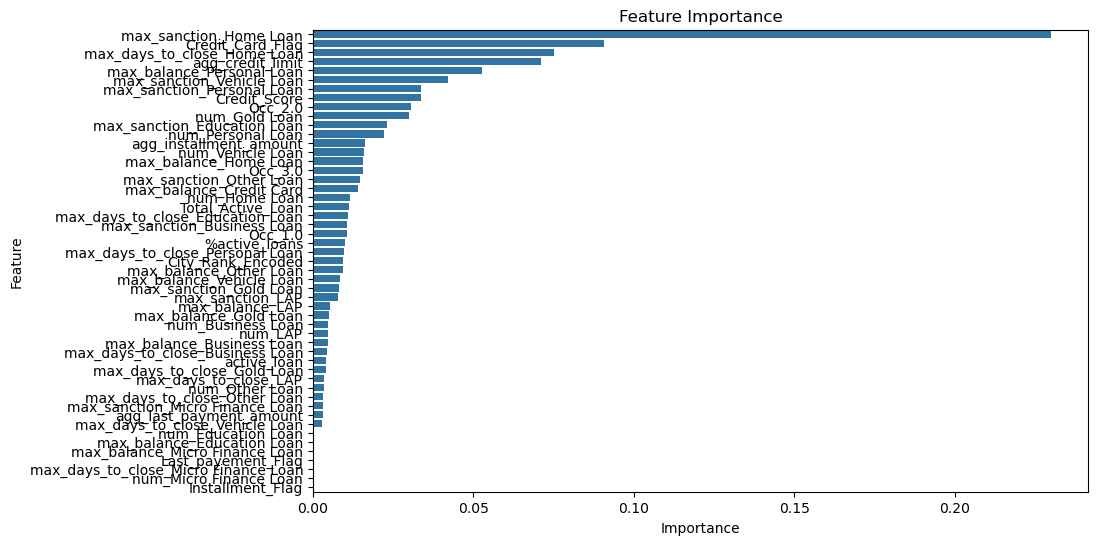

In [3453]:

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [3455]:
#Selecting top 28  features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Select the top 28 features
top_n = 20
top_features = X.columns[indices][:top_n]
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


In [3457]:
top_features

Index(['max_sanction_Home Loan', 'Credit_Card_Flag',
       'max_days_to_close_Home Loan', 'agg_credit_limit',
       'max_balance_Personal Loan', 'max_sanction_Vehicle Loan',
       'max_sanction_Personal Loan', 'Credit_Score', 'Occ_2.0',
       'num_Gold Loan', 'max_sanction_Education Loan', 'num_Personal Loan',
       'agg_installment_amount', 'num_Vehicle Loan', 'max_balance_Home Loan',
       'Occ_3.0', 'max_sanction_Other Loan', 'max_balance_Credit Card',
       'num_Home Loan', 'Total_Active_Loan'],
      dtype='object')

#### Grid Search and HyperParameter Tuning

In [3459]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=3, 
                           verbose=1)

grid_search.fit(X_train_top, y_train)



Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [3461]:
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# 5. Retrain the Model with Best Parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(X_train_top, y_train)


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [3465]:
y_pred = best_model.predict(X_test_top)
y_pred = np.expm1(y_pred)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred))  # Inverse log transformation on y_test too
print("RMSE: ", rmse)
r2 = r2_score(np.expm1(y_test), y_pred)

print(f'R-squared: {r2}')


RMSE:  1366631.2727368383
R-squared: 0.2329608537295963


### Lasso Feature Selection ANd Multiple Linear Regression

In [3321]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[lasso.coef_ != 0]
print("Selected features from Lasso:", selected_features)


Selected features from Lasso: Index(['max_sanction_Home Loan', 'max_days_to_close_Home Loan',
       'max_sanction_Vehicle Loan', 'max_sanction_Education Loan',
       'max_sanction_Gold Loan', 'max_sanction_LAP',
       'max_sanction_Business Loan', 'agg_credit_limit',
       'agg_last_payment_amount', 'max_balance_Personal Loan',
       'max_balance_Credit Card'],
      dtype='object')


In [3350]:
import statsmodels.api as sm
# Add a constant (intercept) to the log-transformed independent variables

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_log_const = sm.add_constant(X_train_selected)

model = sm.OLS(y_train, X_train_selected).fit()

# View the summary of the regression model
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:          Annual_Income   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          6.999e+04
Date:                Sun, 13 Oct 2024   Prob (F-statistic):                        0.00
Time:                        06:07:57   Log-Likelihood:                         -90890.
No. Observations:               36478   AIC:                                  1.818e+05
Df Residuals:                   36467   BIC:                                  1.819e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [3323]:
# Create a new DataFrame with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = linear_model.predict(X_test_selected)
y_pred = np.expm1(y_pred)


In [3331]:
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred))  # Inverse log transformation on y_test too
r2 = r2_score(np.expm1(y_test), y_pred)
print("RMSE:", rmse)
print("R²:", r2)


RMSE: 2000798.1102150916
R²: -0.6440739838422544


### Random Forest

In [3335]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data
rf.fit(X_train_selected, y_train)
# Predict on the test set
y_pred = rf.predict(X_test_selected)

rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred))  # Inverse log transformation on y_test too
r2 = r2_score(np.expm1(y_test), y_pred)
print("RMSE:", rmse)
print("R²:", r2)


RMSE: 2000798.0134539274
R²: -0.6440738248232023
